# Youtube Trending video Analysis

<p style="font-size:18px; font-weight:normal">In the project, all YouTube trending videos from 2020-2023 are analyzed. The analysis contains more-advanced and more-interesting elements.</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
#%matplotlib notebook

## <a name="read"></a>Reading the dataset
Then we read the dataset file which is in csv format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/dataset of youtube analysis /archive/IN_youtube_trending_data.csv"
df = pd.read_csv(path)

We set some configuration options just for improving visualization graphs; nothing crucial

In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## <a name="feel"></a>Getting a feel of the dataset
Let's get a feel of our dataset by displaying its first few rows

In [ ]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


Now, let's see some information about our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173746 entries, 0 to 173745
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           173746 non-null  object
 1   title              173746 non-null  object
 2   publishedAt        173746 non-null  object
 3   channelId          173746 non-null  object
 4   channelTitle       173745 non-null  object
 5   categoryId         173746 non-null  int64 
 6   trending_date      173746 non-null  object
 7   tags               173746 non-null  object
 8   view_count         173746 non-null  int64 
 9   likes              173746 non-null  int64 
 10  dislikes           173746 non-null  int64 
 11  comment_count      173746 non-null  int64 
 12  thumbnail_link     173746 non-null  object
 13  comments_disabled  173746 non-null  bool  
 14  ratings_disabled   173746 non-null  bool  
 15  description        156603 non-null  object
dtypes: bool(2), int64(5)

We can see that there are `1,73,746` entries in the dataset. We can see also 

that all columns in the dataset are complete (i.e. they have `1,73,746` non-null entries) except `description` column which has some `null` values; it only has `1,56,603` non-null values.

## <a name="clean"></a>Data cleaning
The `description` column has some null values. These are some of the rows whose description values are null. We can see that null values are denoted by `NaN`

In [ ]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
74,fC3G-P3QINo,DISAPPOINTED | NEED YOUR SUPPORT |,2020-08-11T09:34:58Z,UC2kBDwkqiy7zgH1-M4UtUXQ,Dipika Ki Duniya,22,2020-08-12T00:00:00Z,[None],794840,53933,901,2477,https://i.ytimg.com/vi/fC3G-P3QINo/default.jpg,False,False,NaN
211,DY7auMfX1YU,LIVE: Janmastami - Dwarka: Vhalo Maro Aaavshe ...,2020-08-12T19:30:27Z,UCneBFse451PgKgXJTDqikYA,Doordarshan Girnar,1,2020-08-13T00:00:00Z,DD Girnar|DD|Gujarati|giranar|news,59327,1151,53,28,https://i.ytimg.com/vi/DY7auMfX1YU/default.jpg,False,False,NaN
308,fC3G-P3QINo,DISAPPOINTED | NEED YOUR SUPPORT |,2020-08-11T09:34:58Z,UC2kBDwkqiy7zgH1-M4UtUXQ,Dipika Ki Duniya,22,2020-08-13T00:00:00Z,[None],898632,57324,1030,2612,https://i.ytimg.com/vi/fC3G-P3QINo/default.jpg,False,False,NaN


So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the `description` column

In [ ]:
df["description"] = df["description"].fillna(value="")

In [ ]:
df.dropna(subset=["trending_date"], inplace=True)

In [ ]:
df = df[df["trending_date"] != ' Mike']

## <a name="coll"></a>Dataset collection years
Let's see in which years the dataset was collected

In [ ]:
df["publishing_year"] = df["trending_date"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%Y'))
df["publishing_day"] = df["trending_date"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["trending_date"].apply(lambda x: x[11:13])
df.drop(labels='trending_date', axis=1, inplace=True)

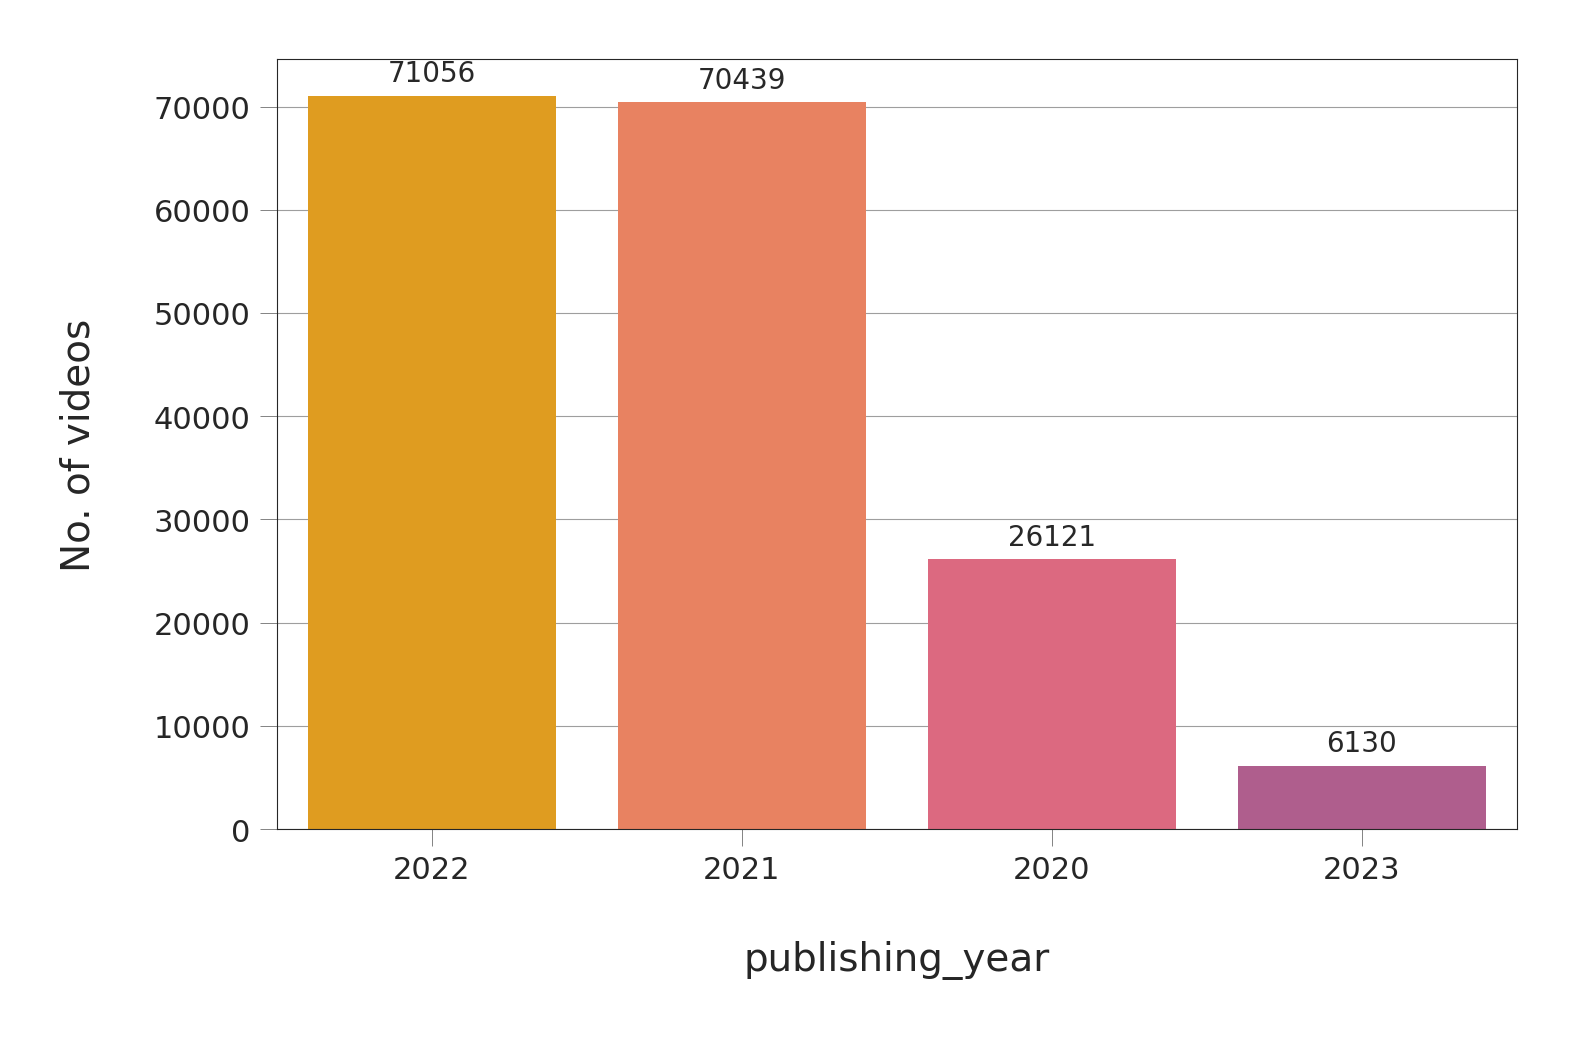

In [ ]:
cdf = df["publishing_year"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_year", "publishing_year": "No_of_videos"})
fig, ax = plt.subplots()
ax.set_facecolor('white') 
_ = sns.barplot(x="publishing_year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ffa600', '#ff764a', '#ef5675', 
                                           '#bc5090'], n_colors=4), ax=ax)
_ = ax.set(xlabel="publishing_year", ylabel="No. of videos")
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=10)

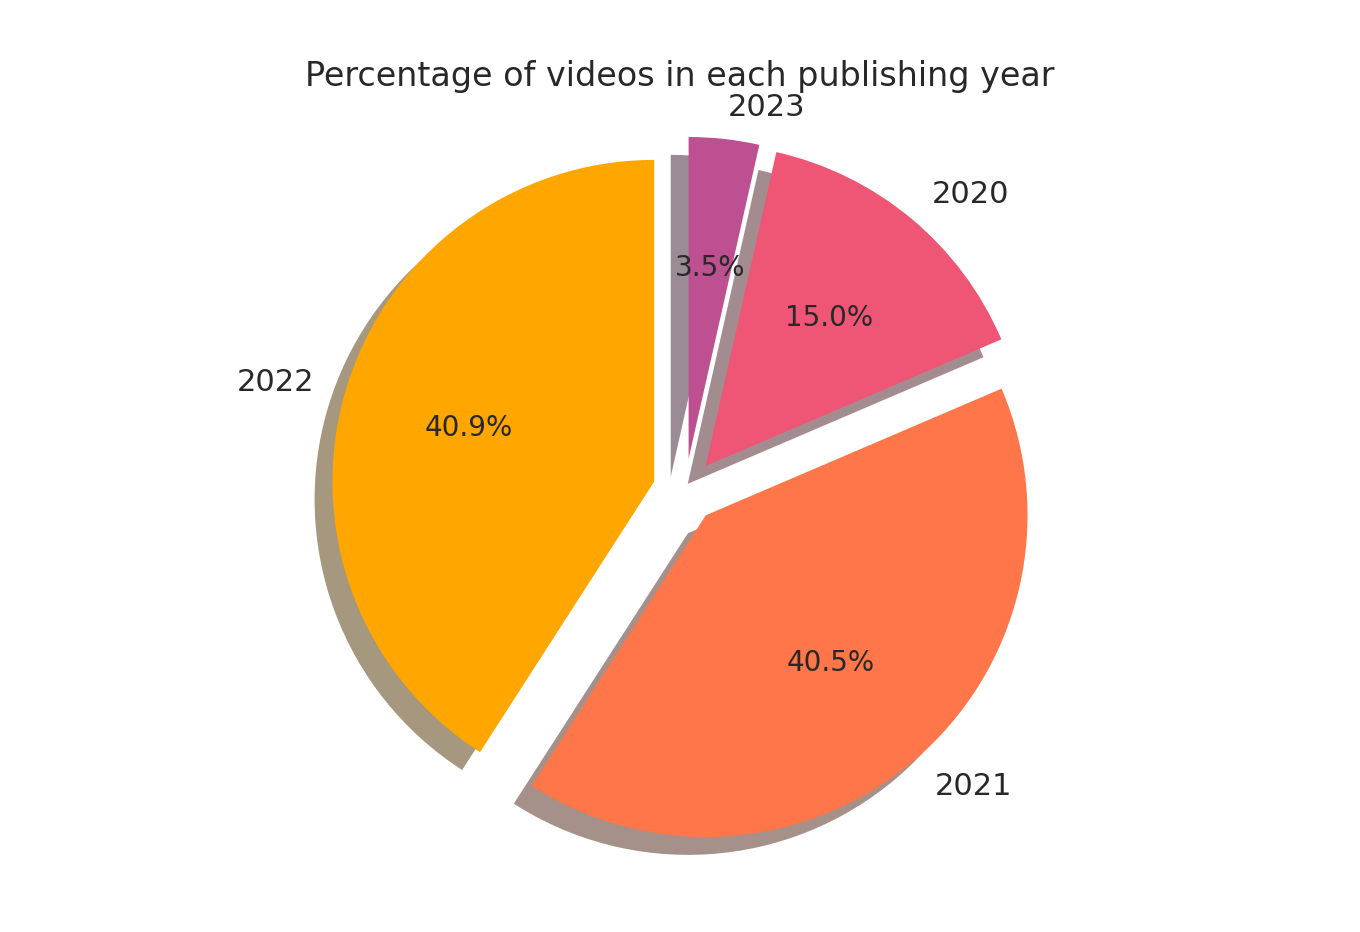

In [ ]:
plt.figure()
sizes = cdf["No_of_videos"]
labels = cdf["publishing_year"]
explode = [0.1] * len(sizes)  # add some separation between slices
_ = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors=sns.color_palette(['#ffa600', '#ff764a', '#ef5675',
                                           '#bc5090'], n_colors=4))
_ = plt.axis('equal')
_ = plt.title("Percentage of videos in each publishing year")
plt.show()

We can see that the dataset was collected in 2020, 2021, 2022 and 2023 with `15%`,`40.5%`, `40.9%`and `3.5` of total dataset.

## <a name="descn"></a>Describtion of numerical columns
Now, let's see some statistical information about the numerical columns of our dataset

In [ ]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,173746.00,173746.00,173746.00,173746.00,173746.00
mean,20.87,3050338.16,160828.11,3374.42,9542.06
std,6.00,7326051.90,427128.58,86565.64,82118.13
min,1.00,0.00,0.00,0.00,0.00
25%,20.00,438484.25,16004.00,0.00,396.00
50%,24.00,1066285.00,47079.50,186.00,1287.00
75%,24.00,2711781.50,138637.75,1564.00,4492.00
max,29.00,264407389.00,16115240.00,12341474.00,6738565.00


We note from the table above that 
- The average number of views of a trending video is `30,50,338.16`. The median value for the number of views is `10,66,285`, which means that one third the trending videos have views that are less than that number, and the other half have views larger than that number
- The average number of likes of a trending video is `74,266`, while the average number of dislikes is `3,711`. The 
- Average comment count is `8,446` while the median is `1,856`

How useful are the observations above? Do they really represent the data? Let's examine more. 

### <a name="vh"></a>Views histogram
let's plot a [histogram](https://www.mathsisfun.com/data/histograms.html) for the `views` column to take a look at its distribution: to see how many videos have between `10` million and `20` million views, how many videos have between `20` million and `30` million views, and so on.

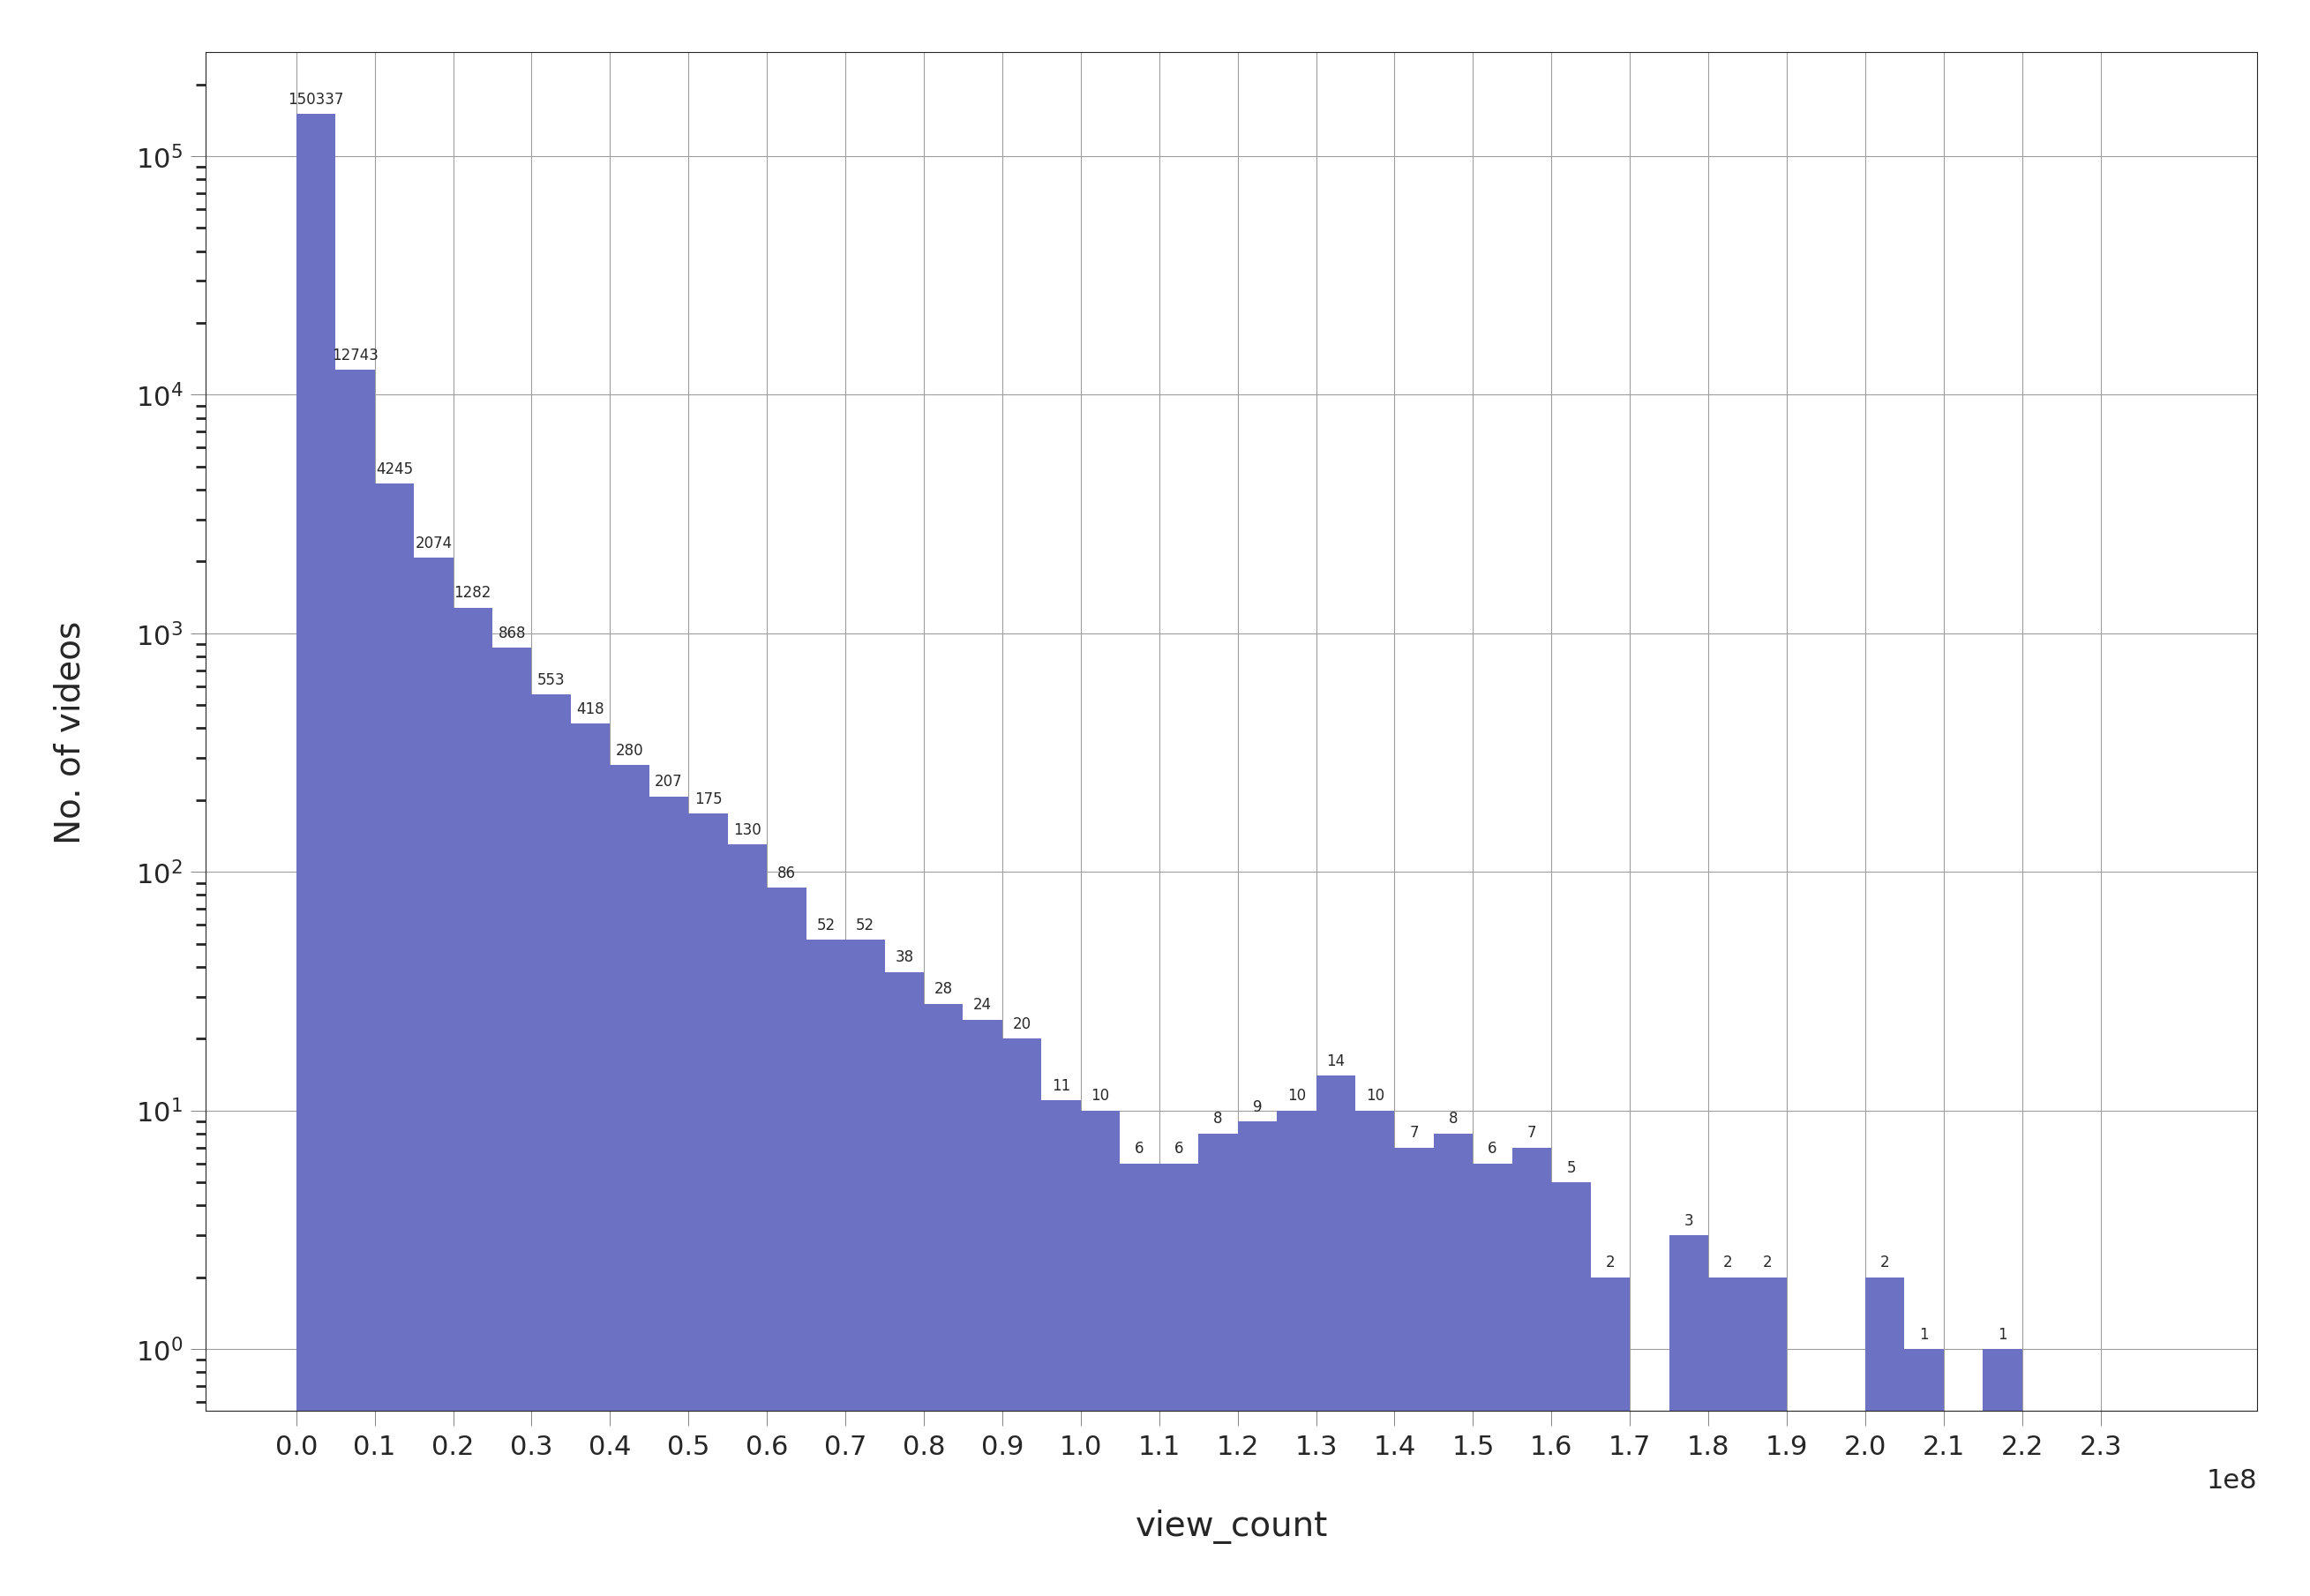

In [ ]:
# Define plot colors
PLOT_COLORS = ["#268BD2", "#D33682", "#F4A200", "#859900", "#6C71C4"]

# Convert non-numeric values in "view_count" column to NaN
df["view_count"] = pd.to_numeric(df["view_count"], errors="coerce")

# Create histogram
fig, ax = plt.subplots(figsize=(15, 10)) 
_ = sns.distplot(df["view_count"].dropna(), kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="view_count", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = ax.set_yscale('log') # set y-axis scale to logarithmic
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)

# Show plot
plt.show()


We note that the vast majority of trending videos have `5` million views or less. We get the `5` million number by calculating

\begin{align}
\frac{0.1 \times 10^8}{2} = 5 \times 10^6
\end{align}

Now let us plot the histogram just for videos with `25` million views or less to get a closer look at the distribution of the data

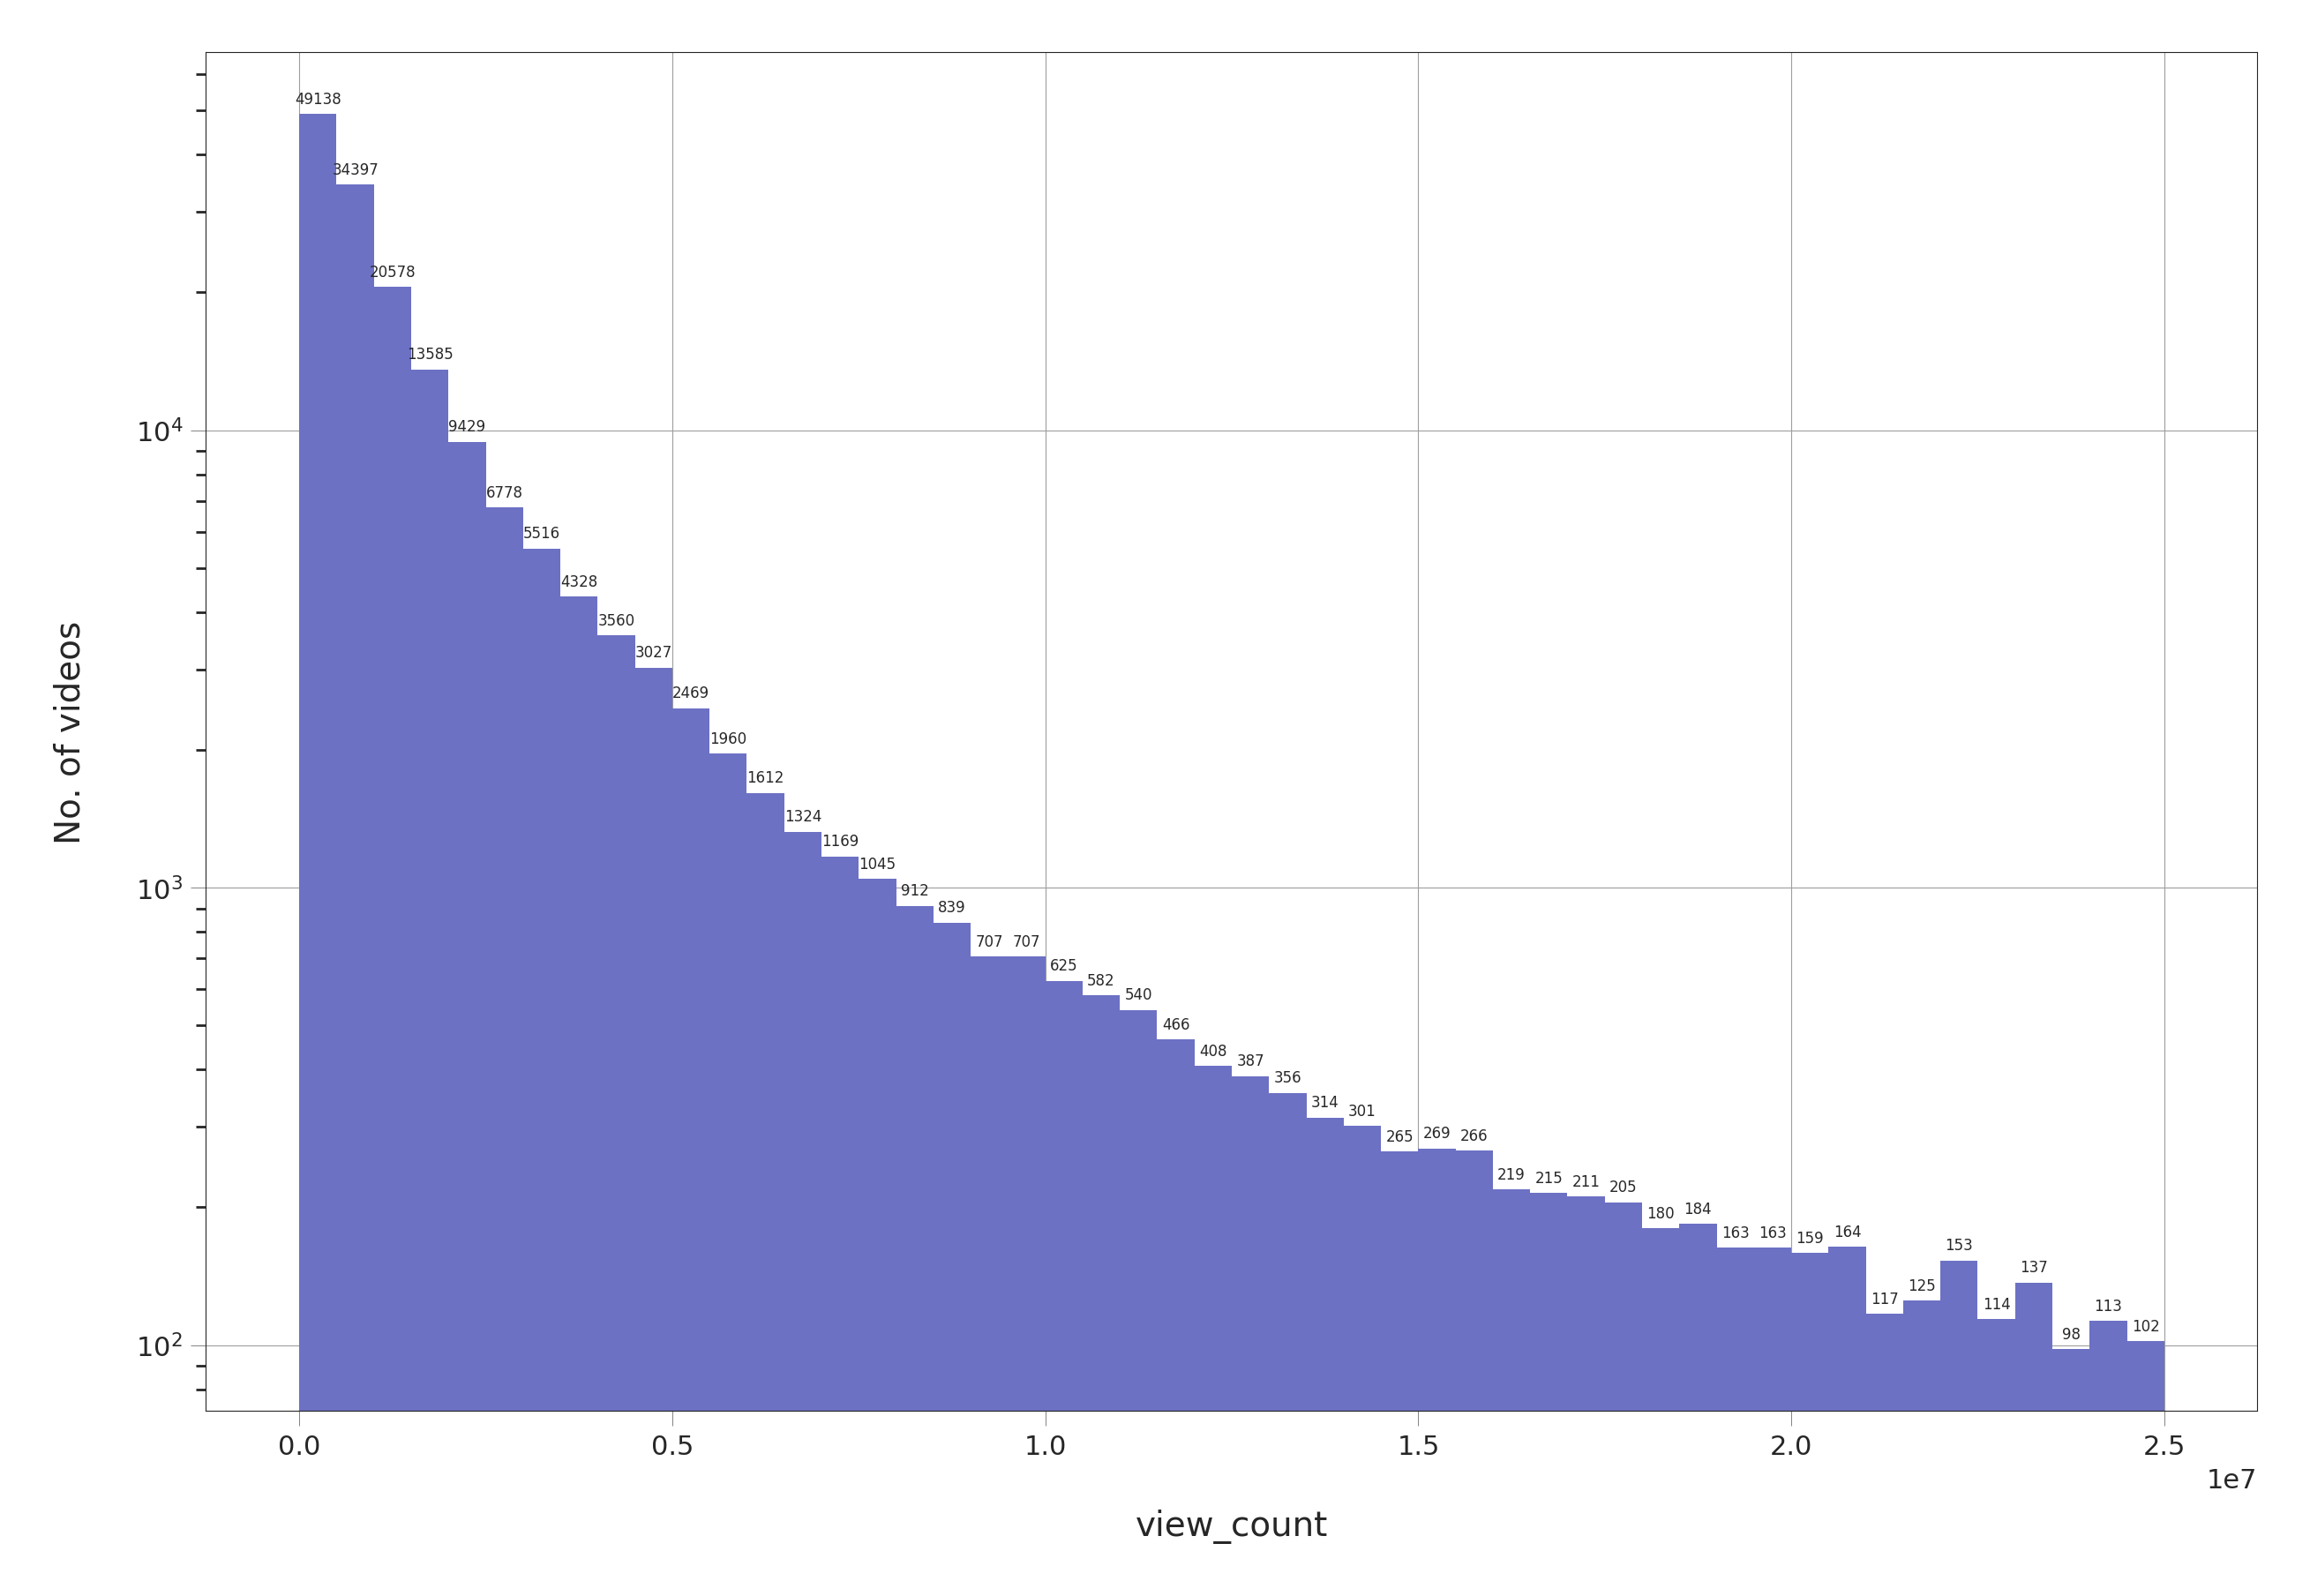

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
_ = sns.distplot(df[df["view_count"] < 25e6]["view_count"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="view_count", ylabel="No. of videos")
ax.set_yscale('log')
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)


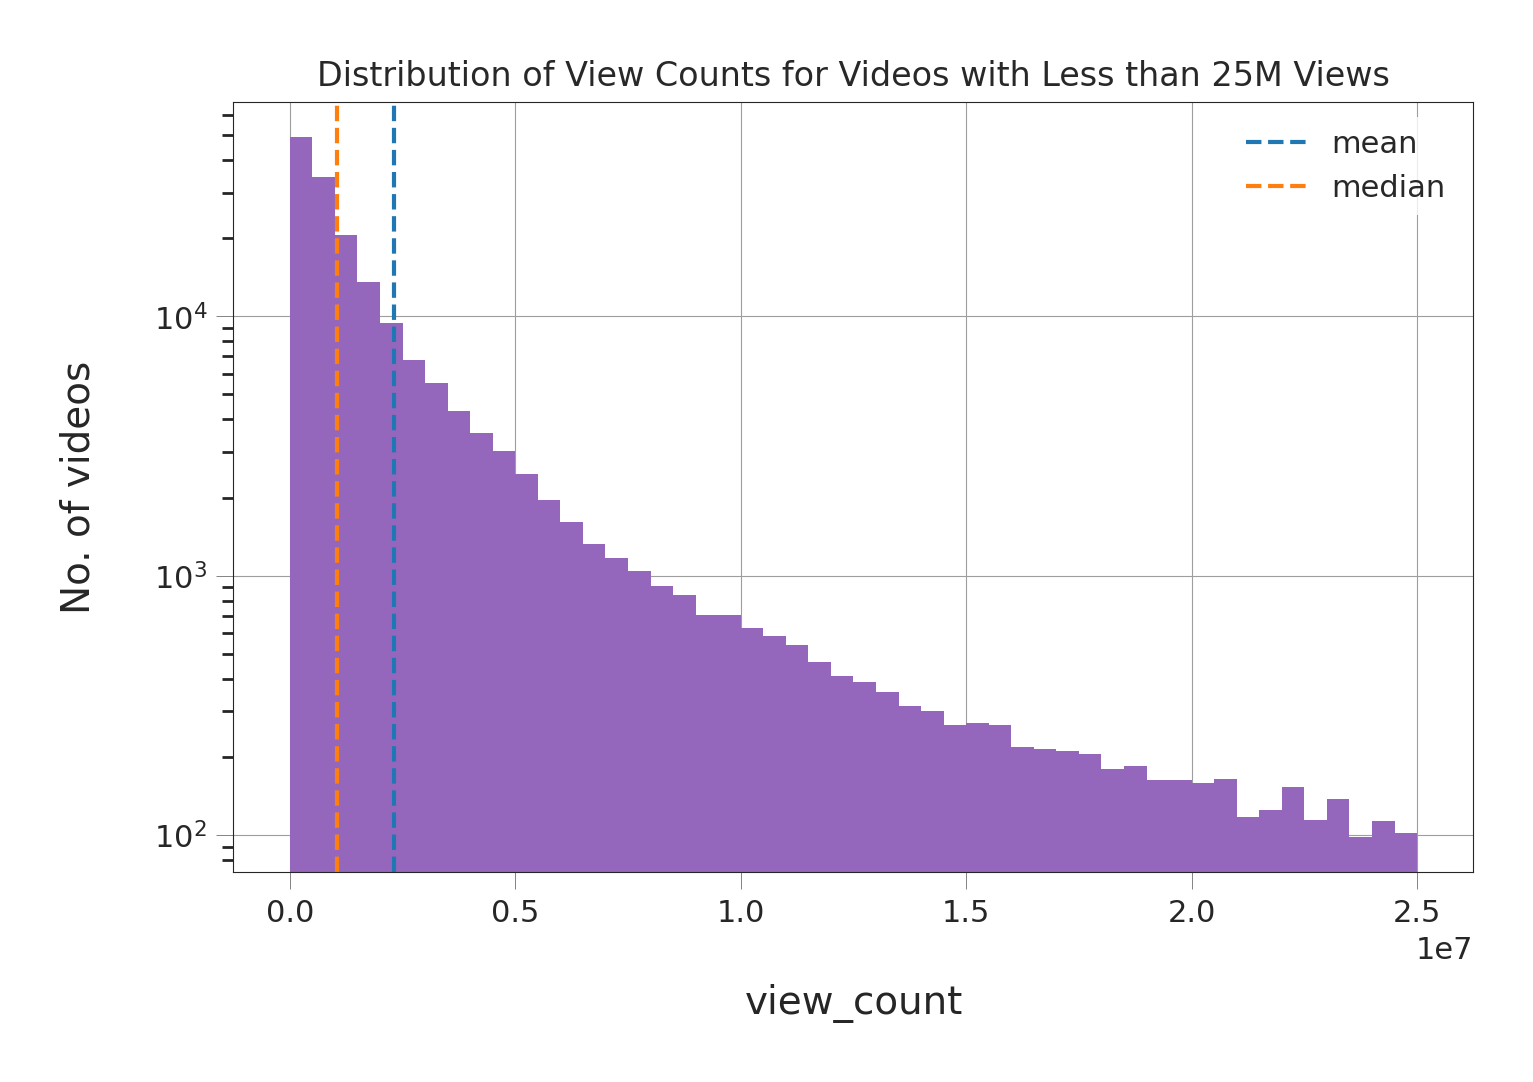

In [ ]:
# Define the plot colors
PLOT_COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the plot
fig, ax = plt.subplots()
_ = sns.distplot(df[df["view_count"] < 25e6]["view_count"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)

# Set the axis labels and title
_ = ax.set(xlabel="view_count", ylabel="No. of videos", 
           title="Distribution of View Counts for Videos with Less than 25M Views")

# Add vertical lines to show mean and median
mean = df[df["view_count"] < 25e6]["view_count"].mean()
median = df[df["view_count"] < 25e6]["view_count"].median()
_ = ax.axvline(mean, color=PLOT_COLORS[0], linestyle='--', label='mean')
_ = ax.axvline(median, color=PLOT_COLORS[1], linestyle='--', label='median')
_ = ax.legend()

# Set y-axis to log scale
_ = ax.set_yscale('log')


Now we see that the majority of trending videos have `1` million views or less. Let's see the exact percentage of videos less than `1` million views

In [ ]:
df[df['view_count'] < 1e6]['view_count'].count() / df['view_count'].count() * 100

48.08225800881747

So, it is around `48%`. Similarly, we can see that the percentage of videos with less than `1` million views is around `48%`.

### <a name="lh"></a>Likes histogram

After `views`, we plot the histogram for `likes` column

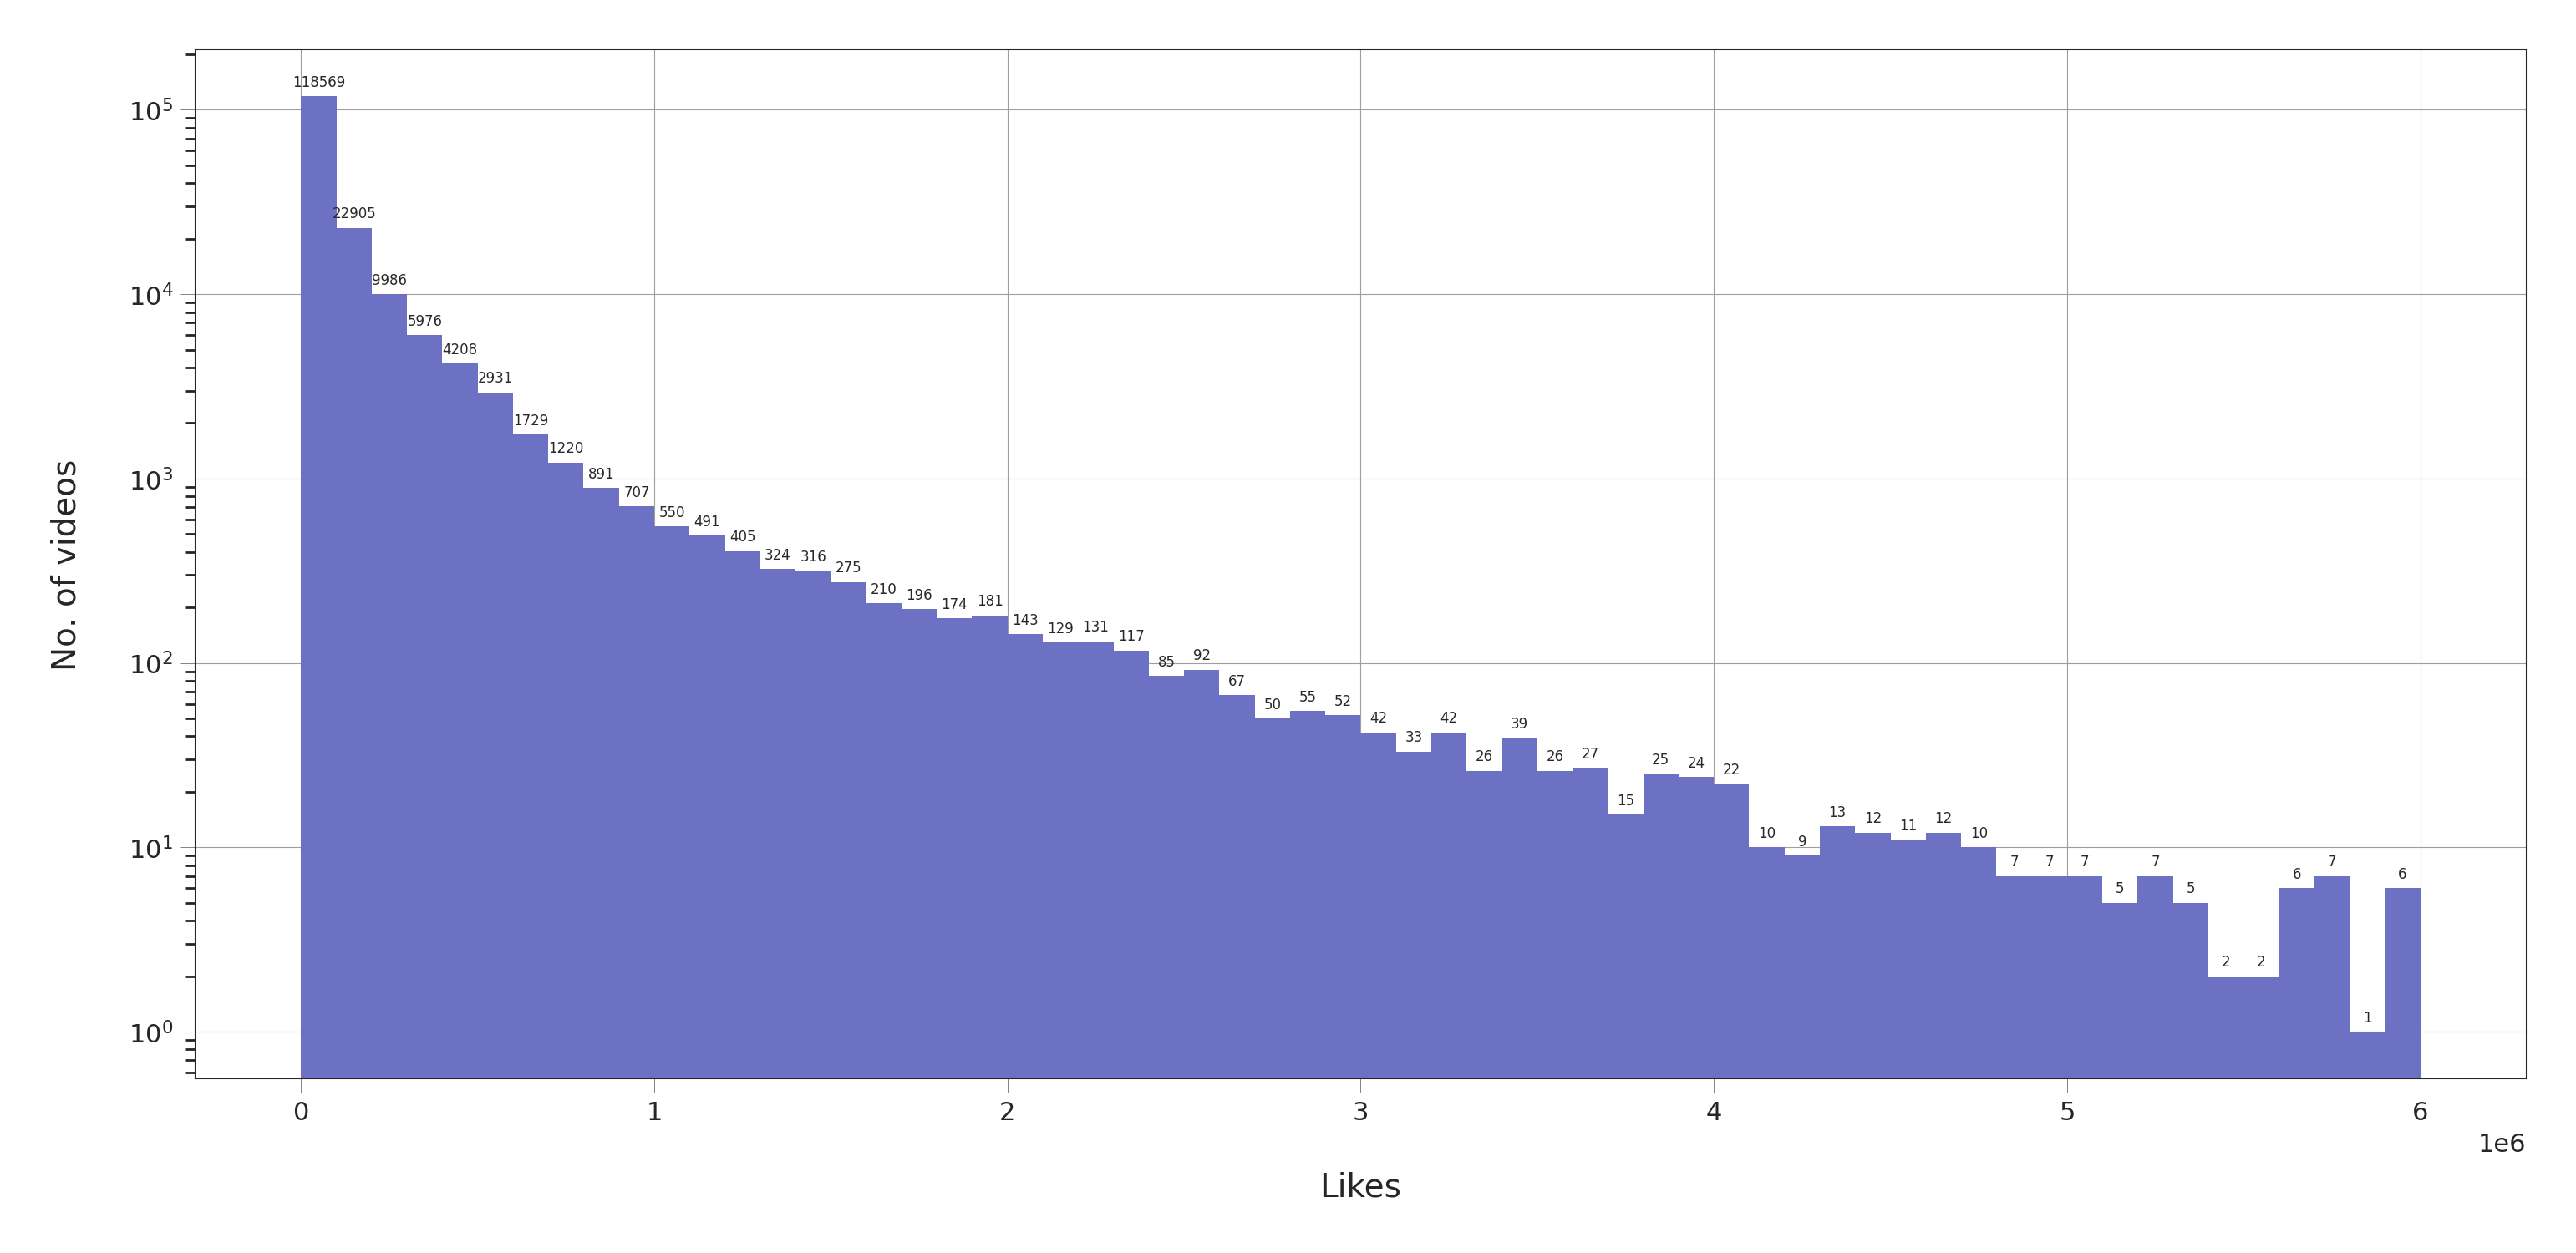

In [ ]:
# Define plot colors
PLOT_COLORS = ["#268BD2", "#D33682", "#F4A200", "#859900", "#6C71C4"]

# Clean "likes" column by removing non-numeric values
df["likes"] = pd.to_numeric(df["likes"], errors="coerce")
df = df.dropna(subset=["likes"])

# Create histogram
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots(figsize=(18,8))
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = ax.set_yscale('log')  # Change y-axis to logarithmic scale
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)


# Show plot
plt.show()


We note that the vast majority of trending videos have between `0` and `1000,000` likes. Let us plot the histogram just for videos with `1000,000` likes or less to get a closer look at the distribution of the data

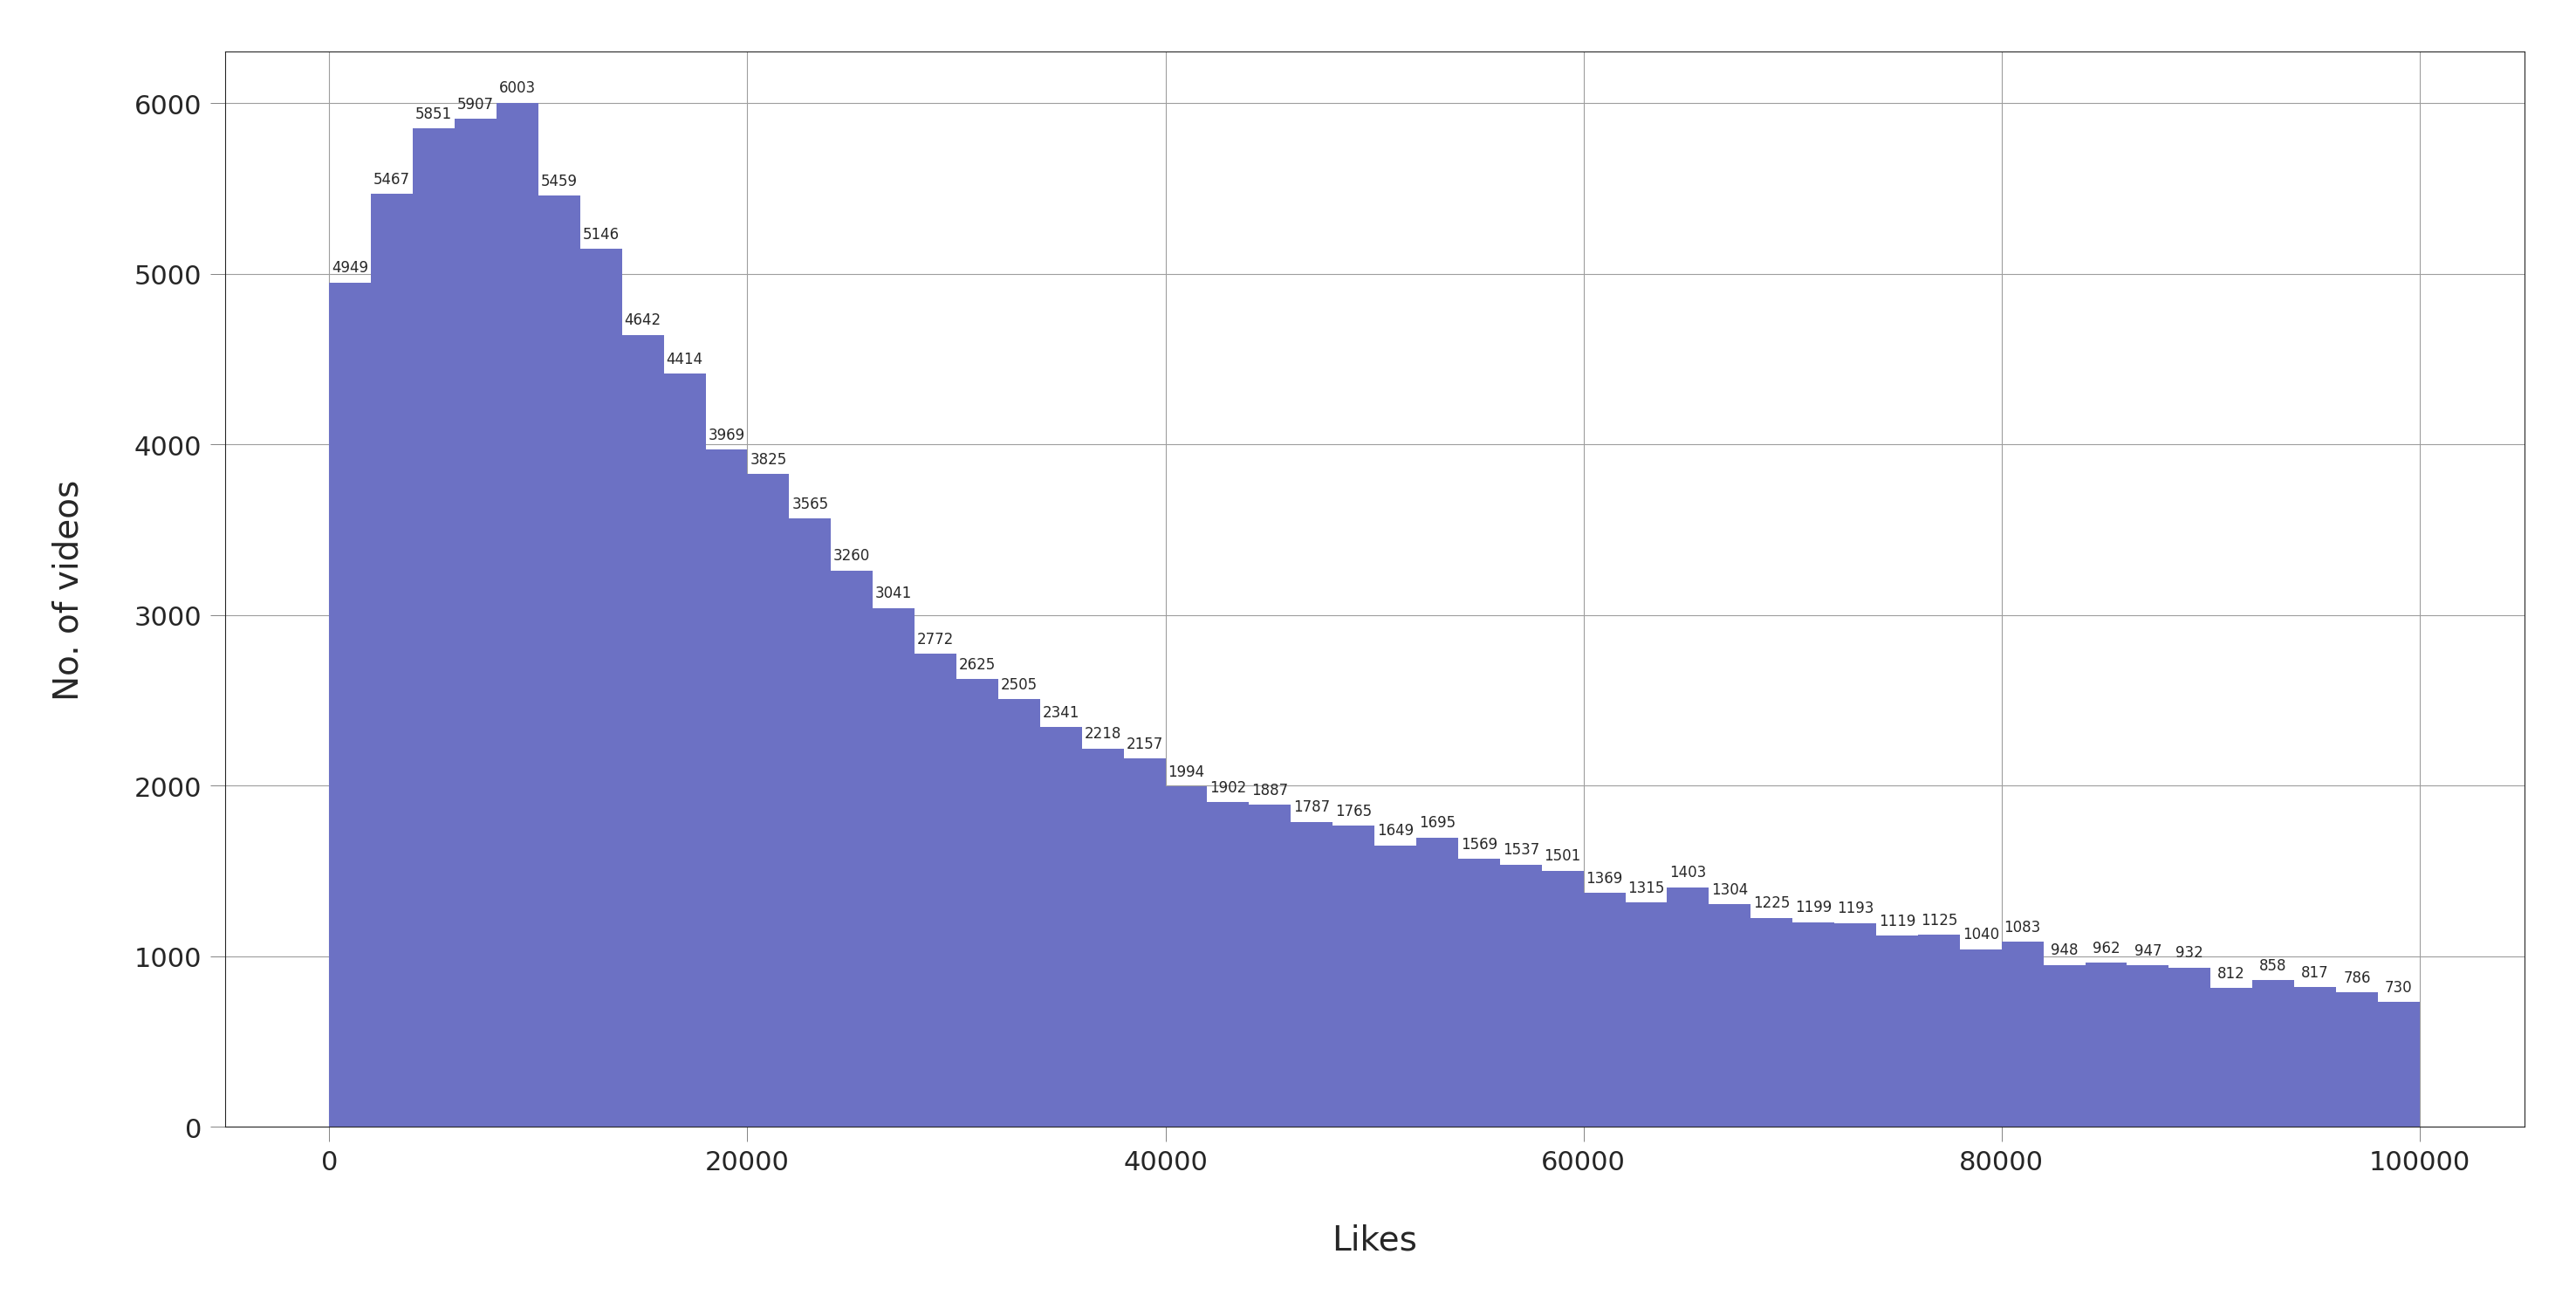

In [ ]:
fig, ax = plt.subplots(figsize=(17,8))
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)

Now we can see that the majority of trending videos have `40000` likes or less with a peak for videos with `2000` likes or less. 

Let's see the exact percentage of videos with less than `40000` likes 

In [ ]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

46.1109896055161

Similarly, we can see that the percentage of videos with less than `40,000` likes is around `46%`

### <a name="ch"></a>Comment count histogram

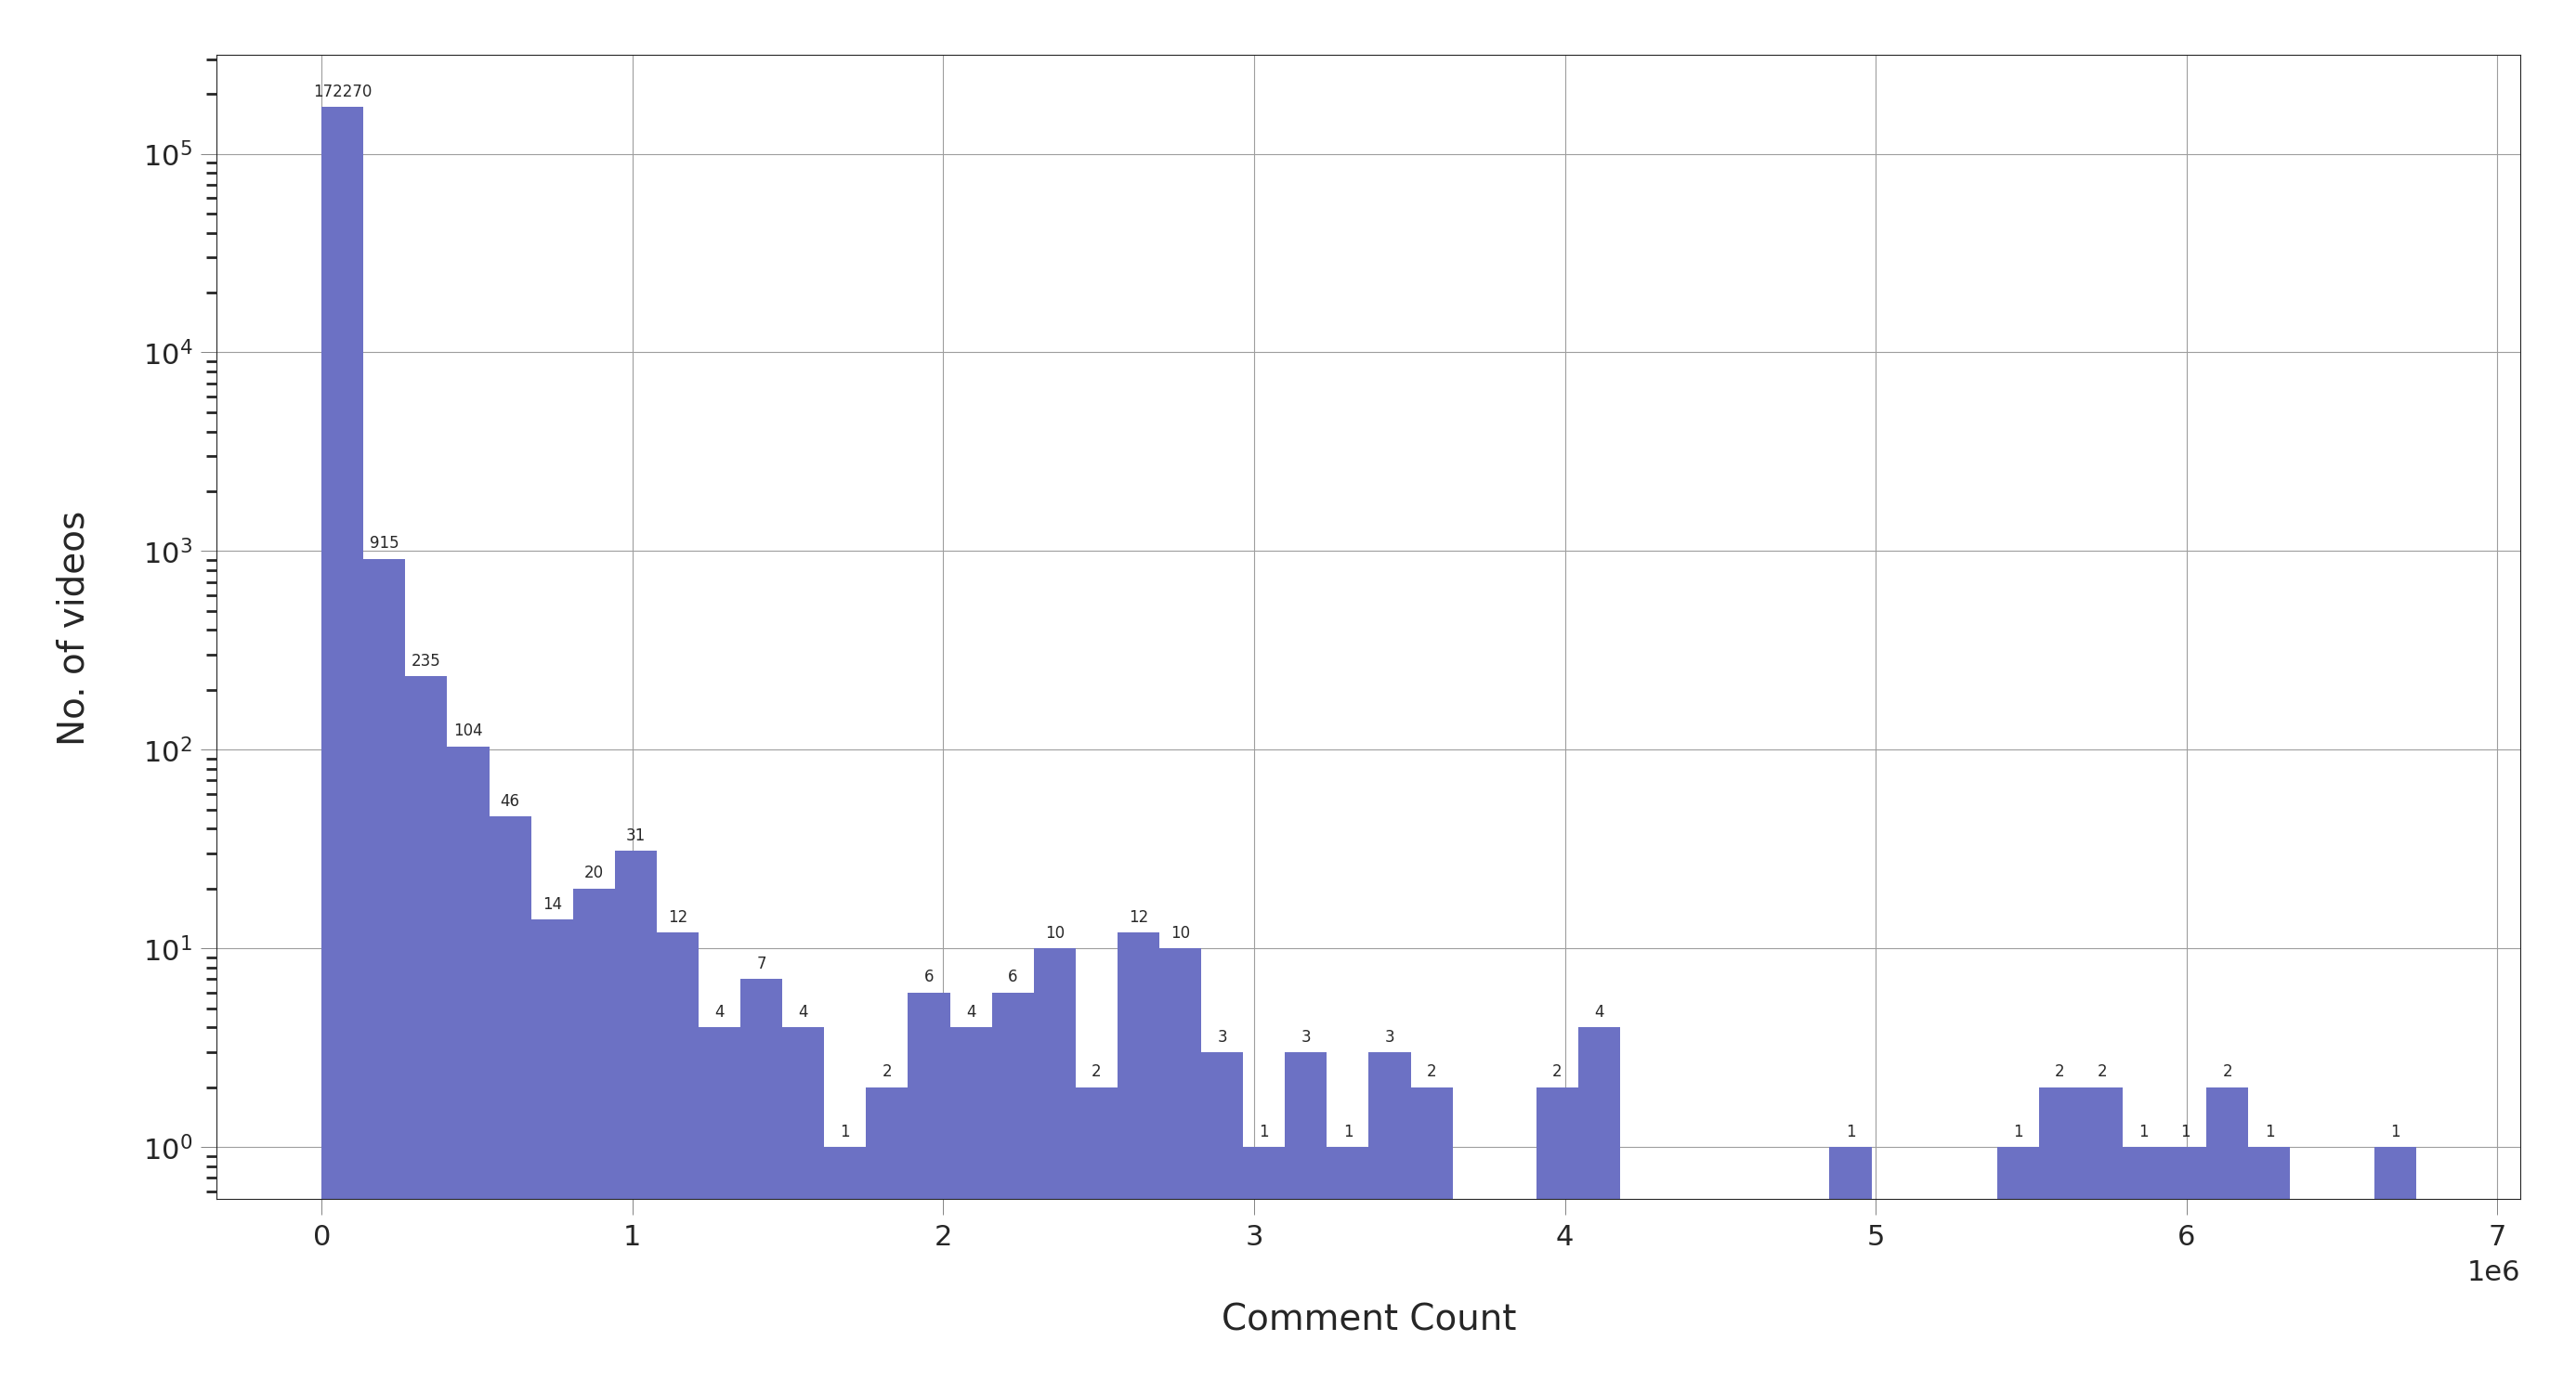

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")
ax.set_yscale('log')
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)


Let's get a closer look by eliminating entries with comment count larger than `200000` comment

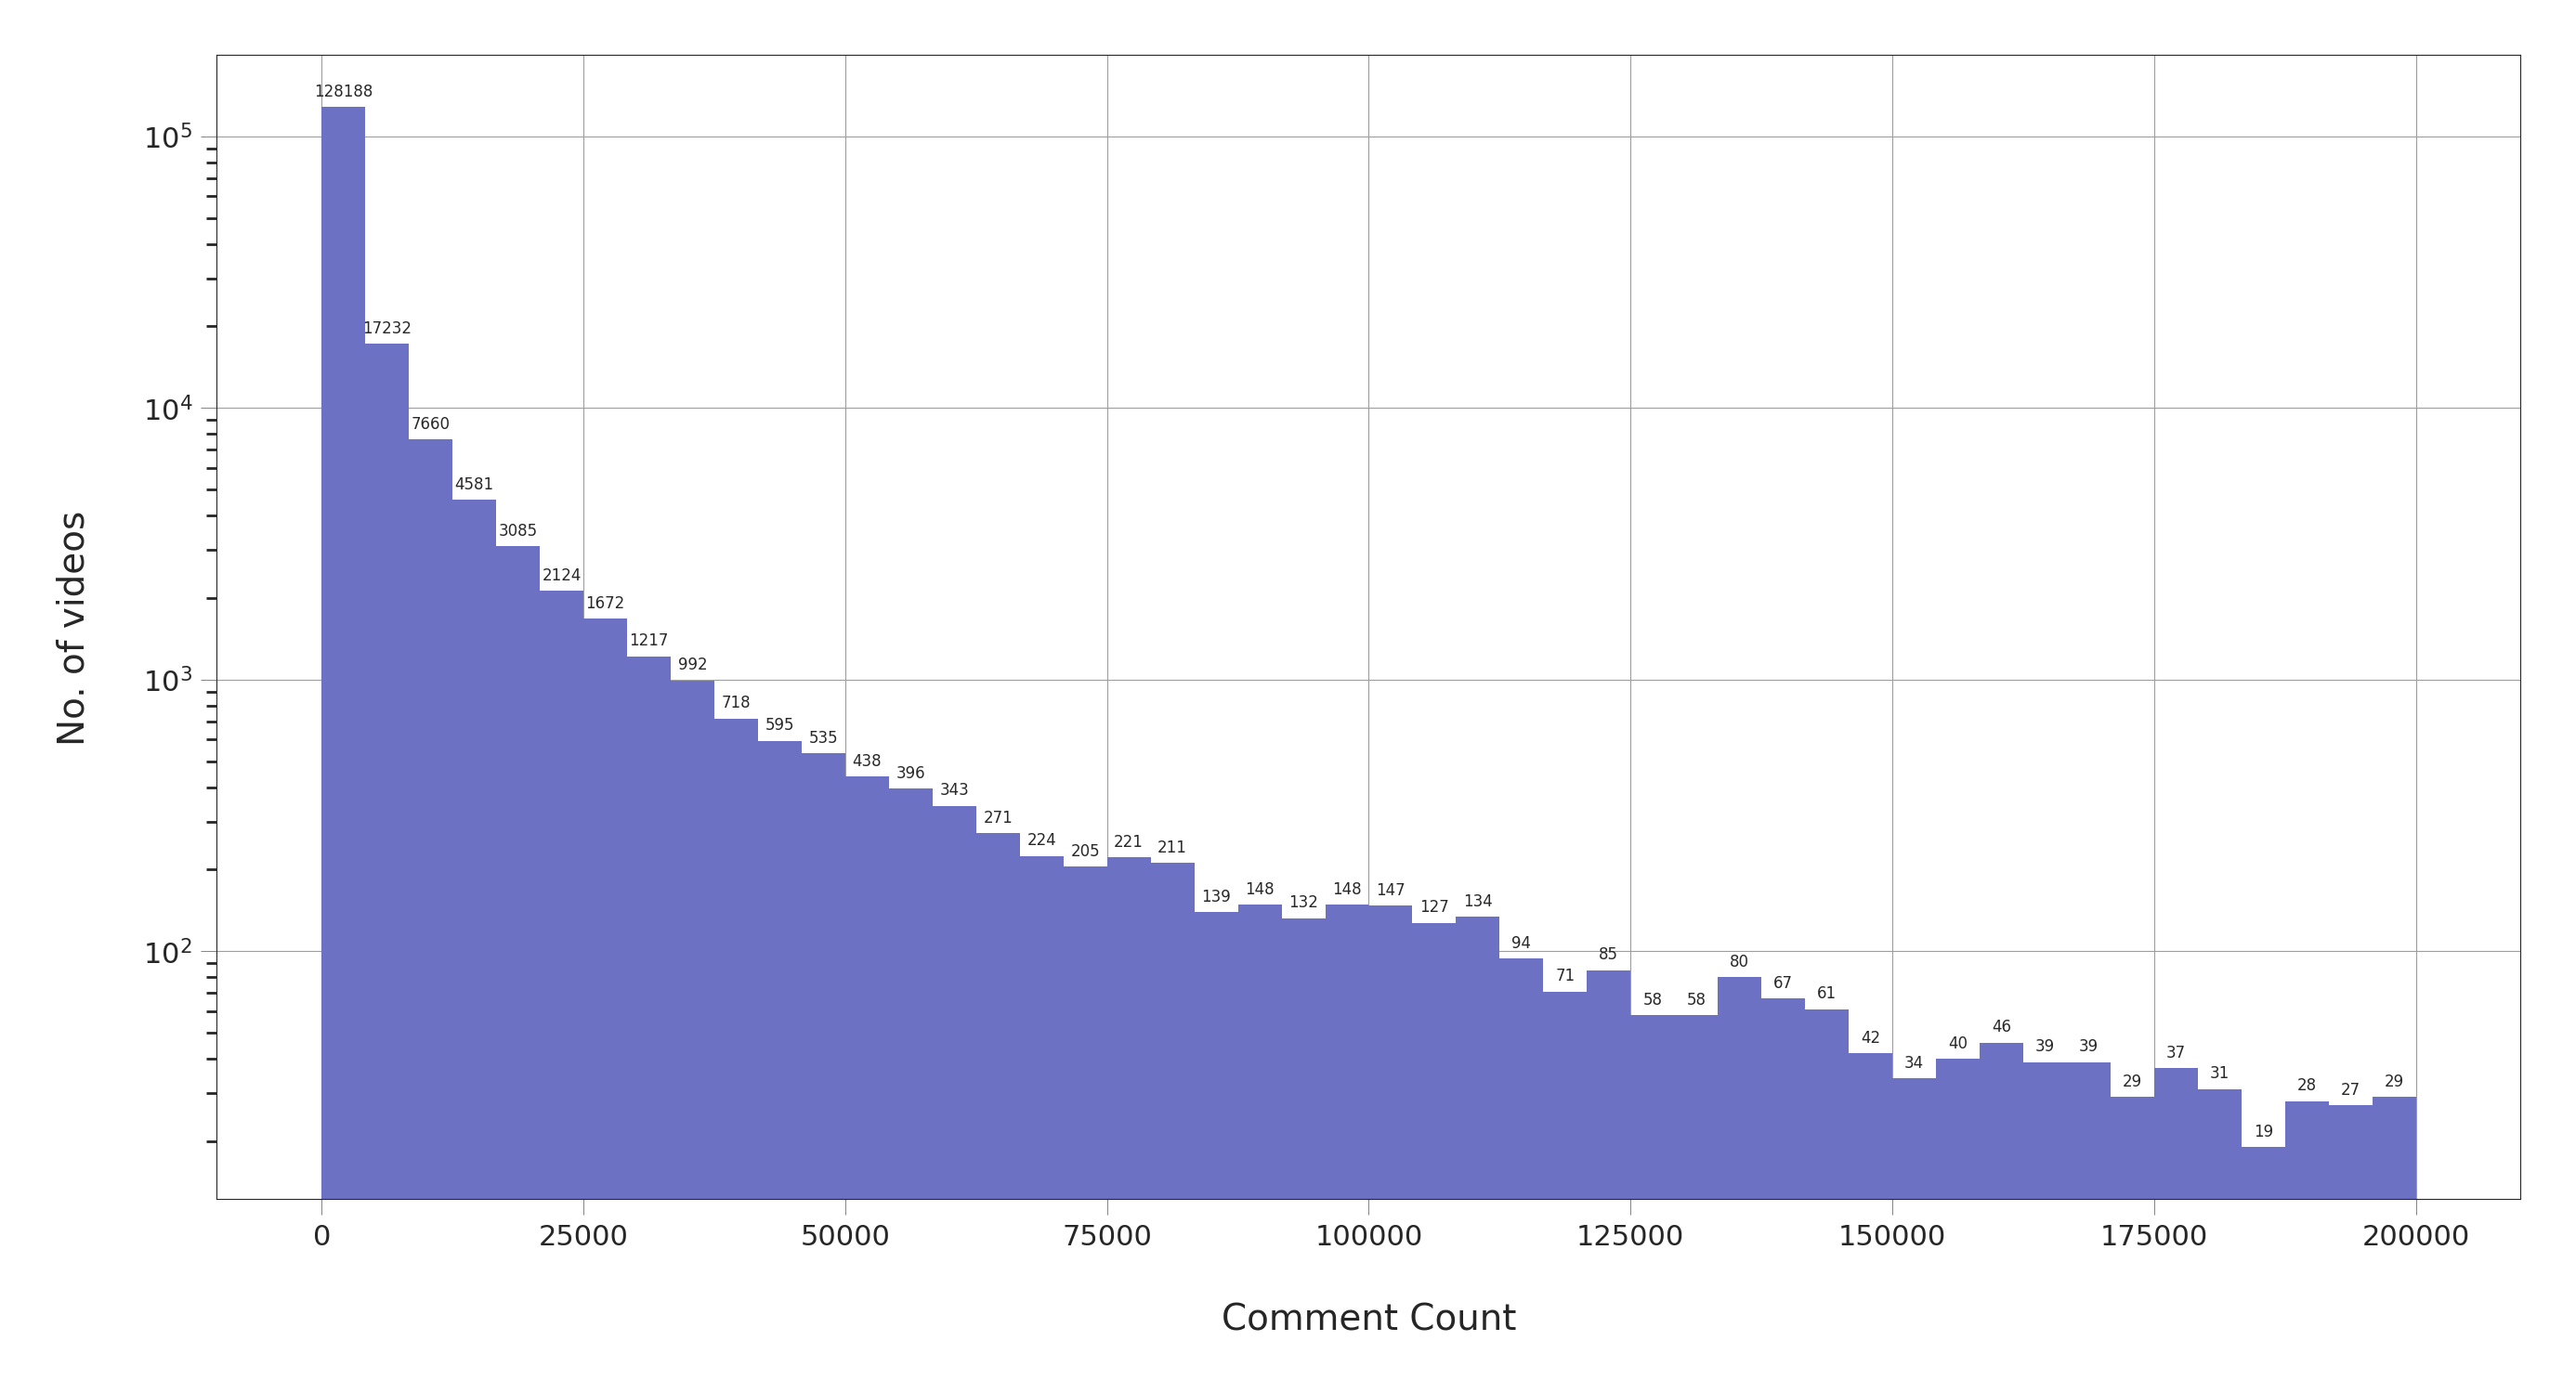

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")
_ = ax.set_yscale("log")
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)


We see that most trending videos have around

\begin{align}
\frac{25000}{6} \approx 4166 \text{ comments}
\end{align}

since each division in the graph has six histogram bins. 

As with views and likes, let's see the exact percentage of videos with less than `4000` comments

In [ ]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

73.06412809503529

In a similar way, we can see that the percentage of videos with less than `4,000` comments  is around `73%`.

## <a name="descnn"></a>Description on non-numerical columns
After we described numerical columns previously, we now describe non-numerical columns

In [ ]:
df.describe(include = ['O'])

,video_id,title,publishedAt,channelId,channelTitle,tags,thumbnail_link,description,publishing_year,publishing_day,publishing_hour
count,173746,173746,173746,173746,173745,173746,173746,173746,173746,173746,173746
unique,53078,53762,52581,4055,4219,33383,53079,45036,4,7,1
top,y_RHQ4mBDKA,#shorts #strugglejeet,2021-06-04T18:15:01Z,UCvrhwpnp2DHYQ1CbXby9ypQ,Vijay Television,[None],https://i.ytimg.com/vi/y_RHQ4mBDKA/default.jpg,,2022,Mon,00
freq,19,41,20,2098,2098,33808,19,17143,71056,25562,173746


From the table above, we can see that there are `205` unique dates, which means that our dataset contains collected data about trending videos over **`205`** days.

From `video_id` description, we can see that there are `40949` videos (which is expected because our dataset contains `40949` entries), but we can see also that there are only `6351` unique videos which means that some videos appeared on the trending videos list **on more than one day**.
The table also tells us that the top frequent title is `WE MADE OUR MOM CRY...HER DREAM CAME TRUE!` and that it appeared `30` times on the trending videos list.

But there is something strange in the description table above: Because there are `6351` unique video IDs, we expect to have `6351` unique video titles also, because we assume that each ID is linked to a corresponding title. One possible interpretation is that a trending video had some title when it appeared on the trending list, then it appeared again on another day but with a modified title. Similar explaination applies for `description` column as well.
For `publish_time` column, the unique values are less than `6351`, but there is nothing strange here, because two different videos may be published at the same time.

To verify our interpretation for `title` column, let's take a look at an example where a trending video appeared more than once on the trending list but with different titles

In [ ]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publishing_year,publishing_day,publishing_hour
130916,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kic...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,7256549,386233,0,21133,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...,2022,Fri,00
131123,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kic...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,8513289,402271,0,22980,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...,2022,Sat,00
131339,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kic...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,9545417,413621,0,24889,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...,2022,Sun,00
131559,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kich...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,10631769,418162,0,25546,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...,2022,Mon,00
131821,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kich...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,11072913,422423,0,26145,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...,2022,Tue,00
132062,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kich...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,11163959,424959,0,26395,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...,2022,Wed,00
132313,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kich...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,11233623,426708,0,26557,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...,2022,Thu,00


We can see that this video appeared on the list with two different titles.

## <a name="cap"></a>How many trending video titles contain capitalized word?
Now we want to see how many trending video titles contain at least a capitalized word (e.g. HOW). To do that, we will add a new variable (column) to the dataset whose value is `True` if the video title has at least a capitalized word in it, and `False` otherwise

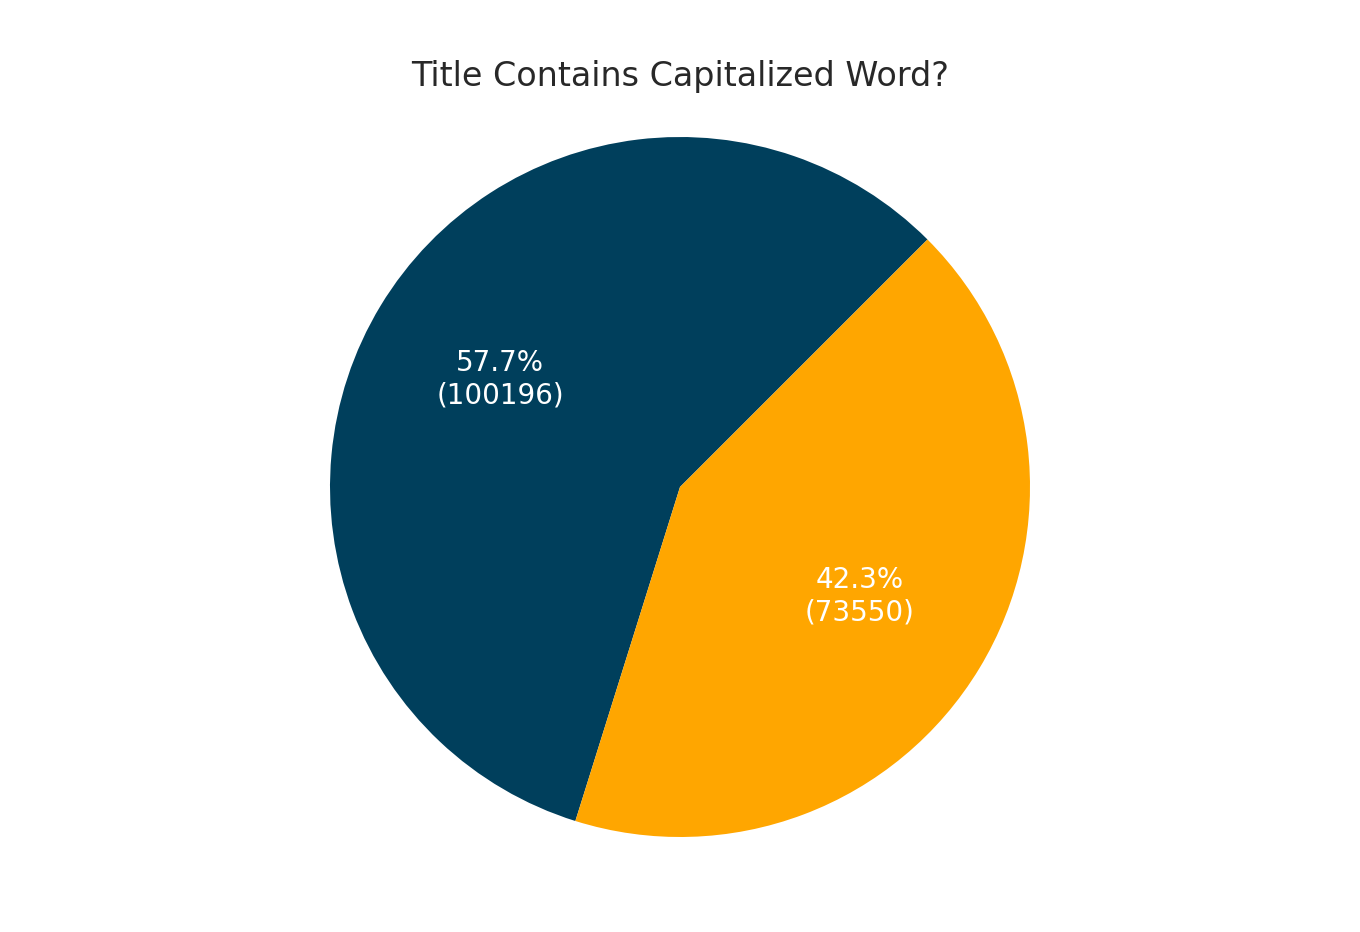

In [ ]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
value_counts = df["contains_capitalized"].value_counts()
fig, ax = plt.subplots()
_ = ax.pie(value_counts, labels=value_counts.index.map({False: 'No', True: 'Yes'}),
           colors=['#003f5c', '#ffa600'], textprops={'color': 'white'},
           autopct=lambda pct: f"{pct:.1f}%\n({pct/100*value_counts.sum():.0f})",
           startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [ ]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.58
True    0.42
Name: contains_capitalized, dtype: float64

We can see that 44% of trending video titles contain at least a capitalized word. We will later use this added new column `contains_capitalized` in analyzing correlation between variables.

## <a name="len"></a>Video title lengths
Let's add another column to our dataset to represent the length of each video title, then plot the histogram of title length to get an idea about the lengths of trnding video titles

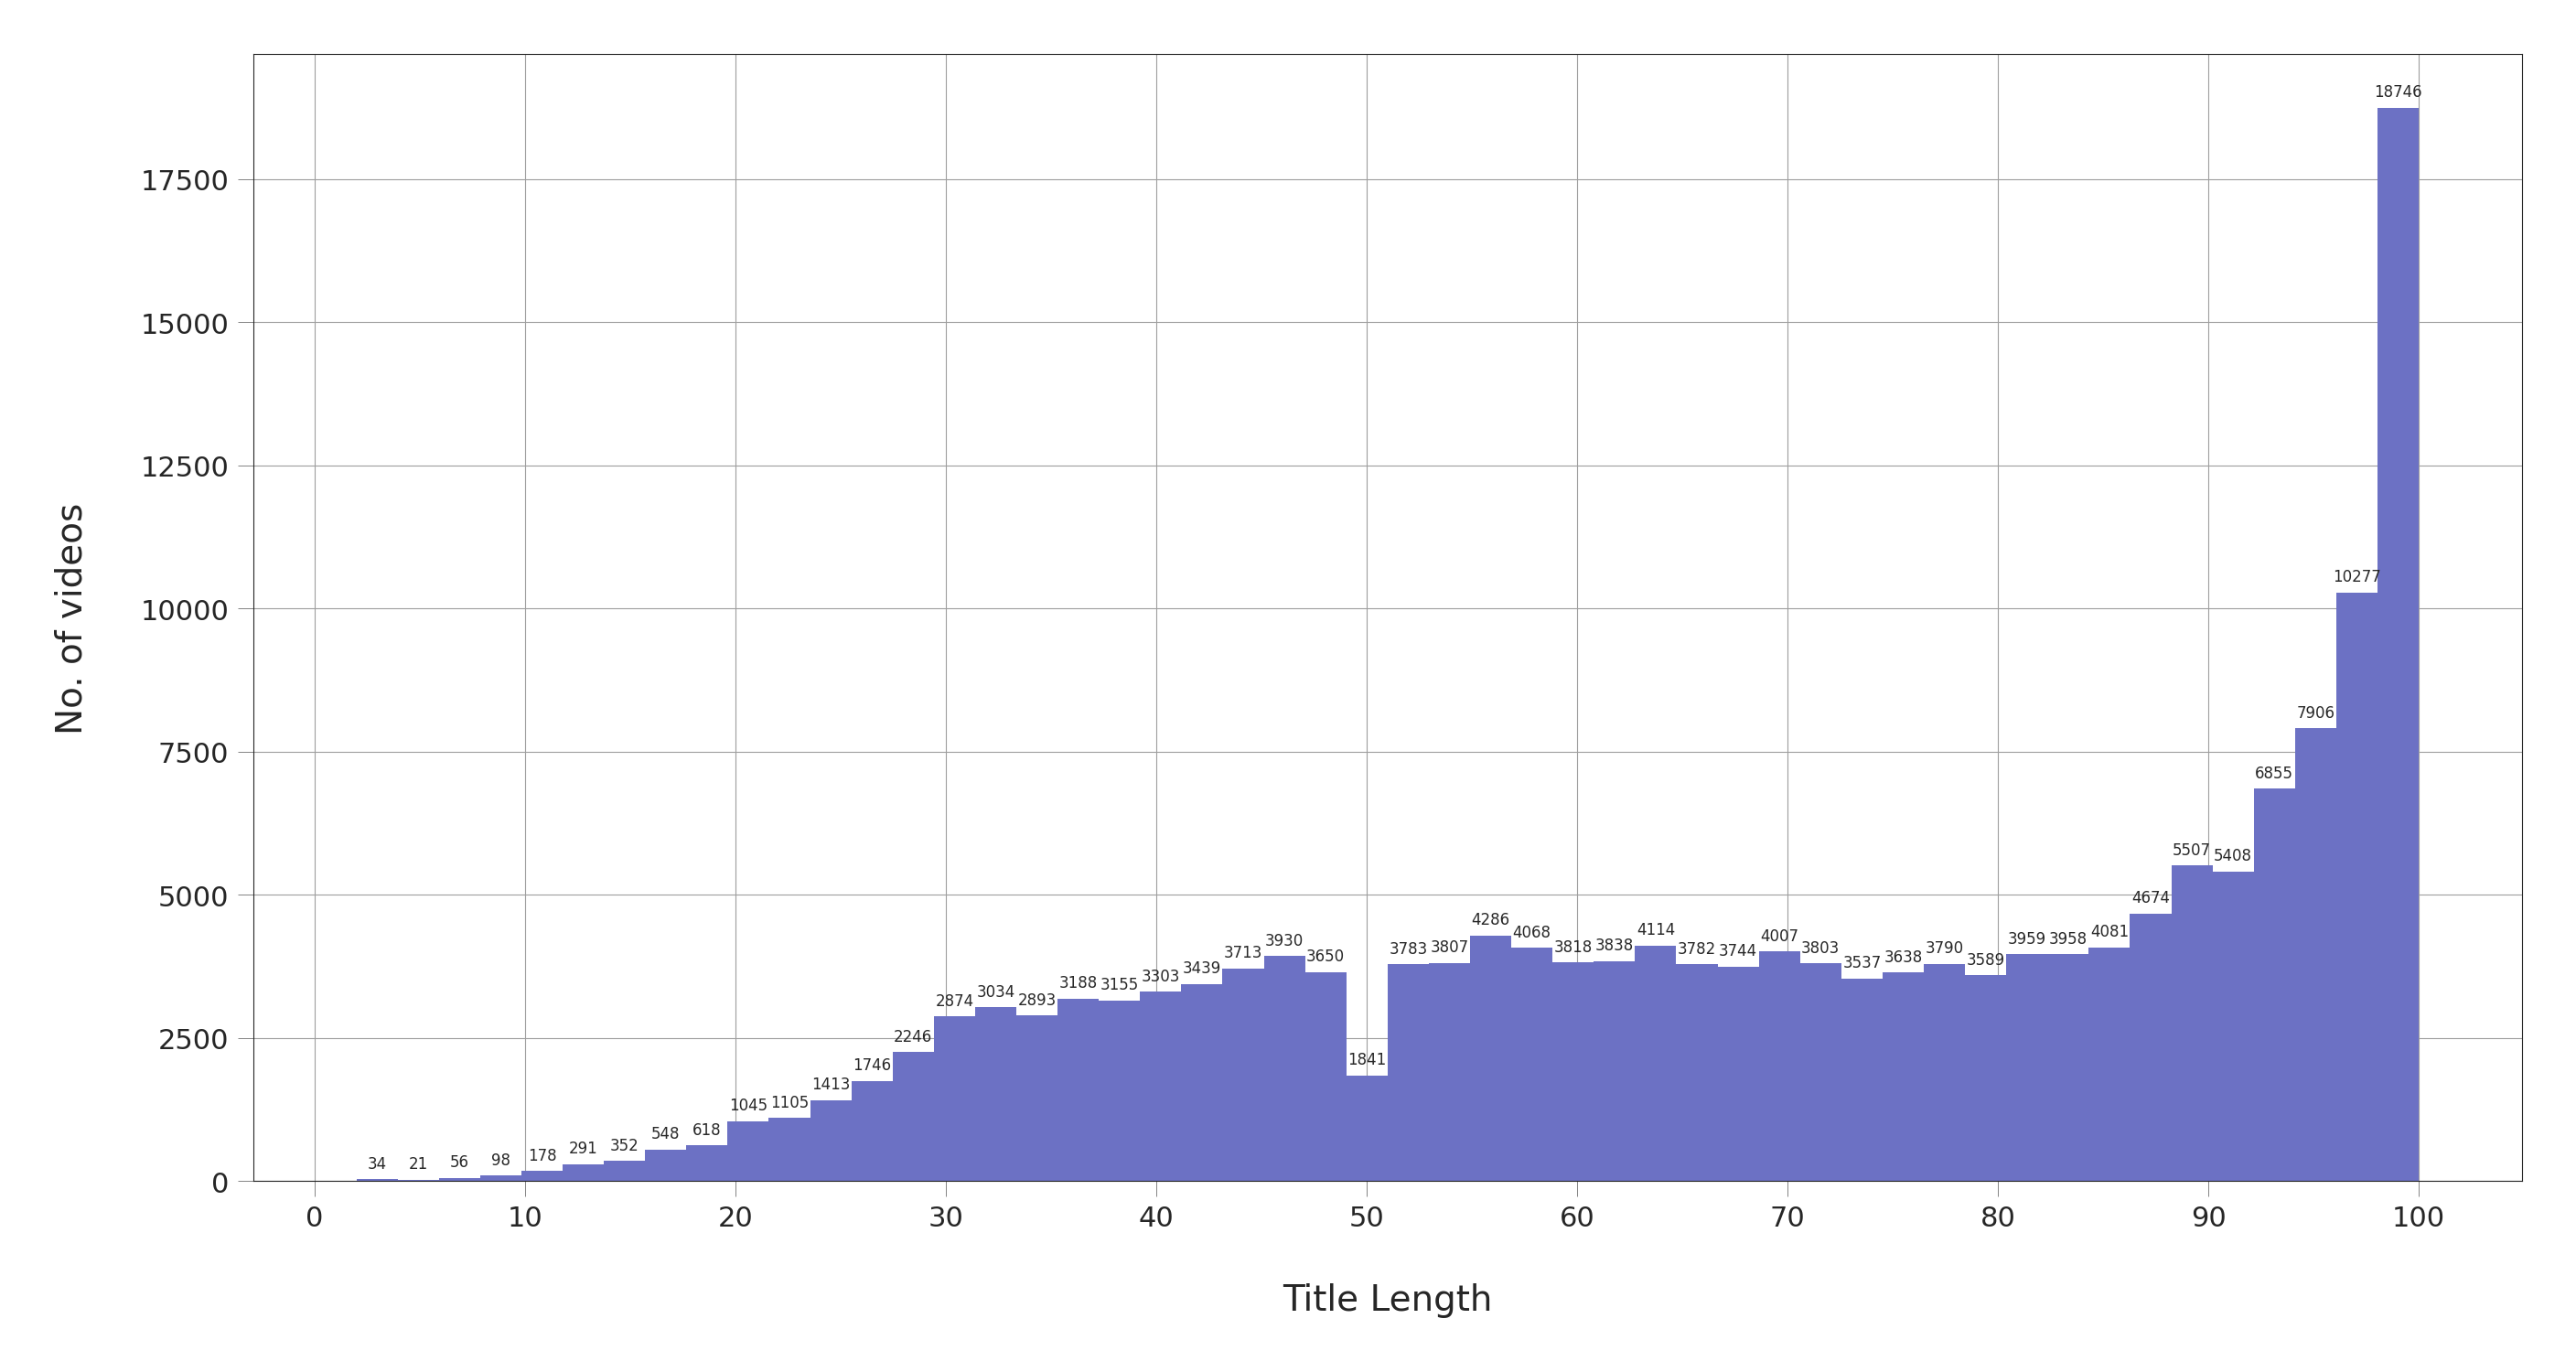

In [ ]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(16,8))
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)

We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 60 and 100 character approximately.

Now let's draw a [scatter plot](https://www.mathsisfun.com/data/scatter-xy-plots.html) between title length and number of views to see the relationship between these two variables

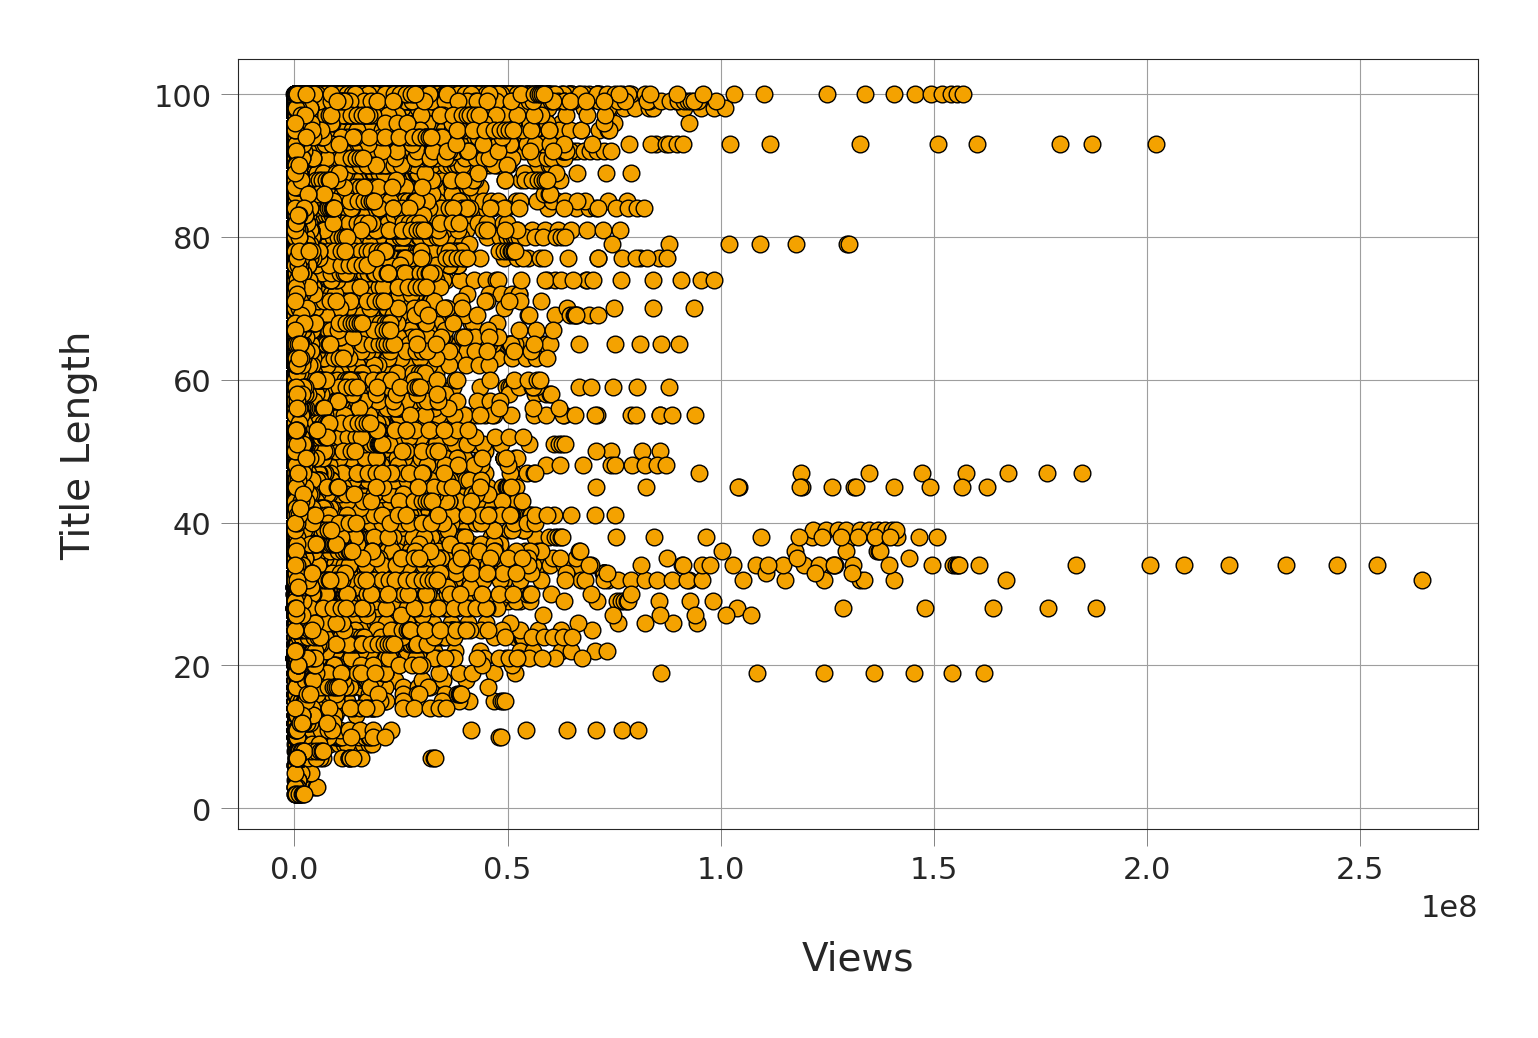

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['view_count'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have `100,000,000` views and more have title length between `33` and `55` characters approximately.

## <a name="corr"></a>Correlation between dataset variables
Now let's see how the dataset variables are [correlated](https://www.mathsisfun.com/data/correlation.html) with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between `-1` and `+1` where `+1` denotes the highest positive correlation, `-1` denotes the highest negative correlation, and `0` denotes that there is no correlation.

Let's see the correlation table between our dataset variables (numerical and boolean variables only)

In [ ]:
df.corr()

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,contains_capitalized,title_length
categoryId,1.00,-0.13,-0.09,-0.01,-0.10,0.03,0.02,-0.10,-0.20
view_count,-0.13,1.00,0.81,0.13,0.47,0.01,0.02,0.01,-0.00
likes,-0.09,0.81,1.00,0.07,0.62,-0.00,-0.04,0.01,-0.11
dislikes,-0.01,0.13,0.07,1.00,0.15,-0.00,-0.00,-0.00,0.01
comment_count,-0.10,0.47,0.62,0.15,1.00,-0.01,-0.01,0.05,-0.04
comments_disabled,0.03,0.01,-0.00,-0.00,-0.01,1.00,0.04,-0.03,-0.03
ratings_disabled,0.02,0.02,-0.04,-0.00,-0.01,0.04,1.00,-0.02,0.01
contains_capitalized,-0.10,0.01,0.01,-0.00,0.05,-0.03,-0.02,1.00,0.06
title_length,-0.20,-0.00,-0.11,0.01,-0.04,-0.03,0.01,0.06,1.00


We see for example that views and likes are highly positively correlated with a correlation value of `0.85`; we see also a high positive correlation (`0.80`) between likes and comment count, and between dislikes and comment count (`0.70`). 

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

Now let's visualize the correlation table above using a [heatmap](https://www.wikiwand.com/en/Heat_map)

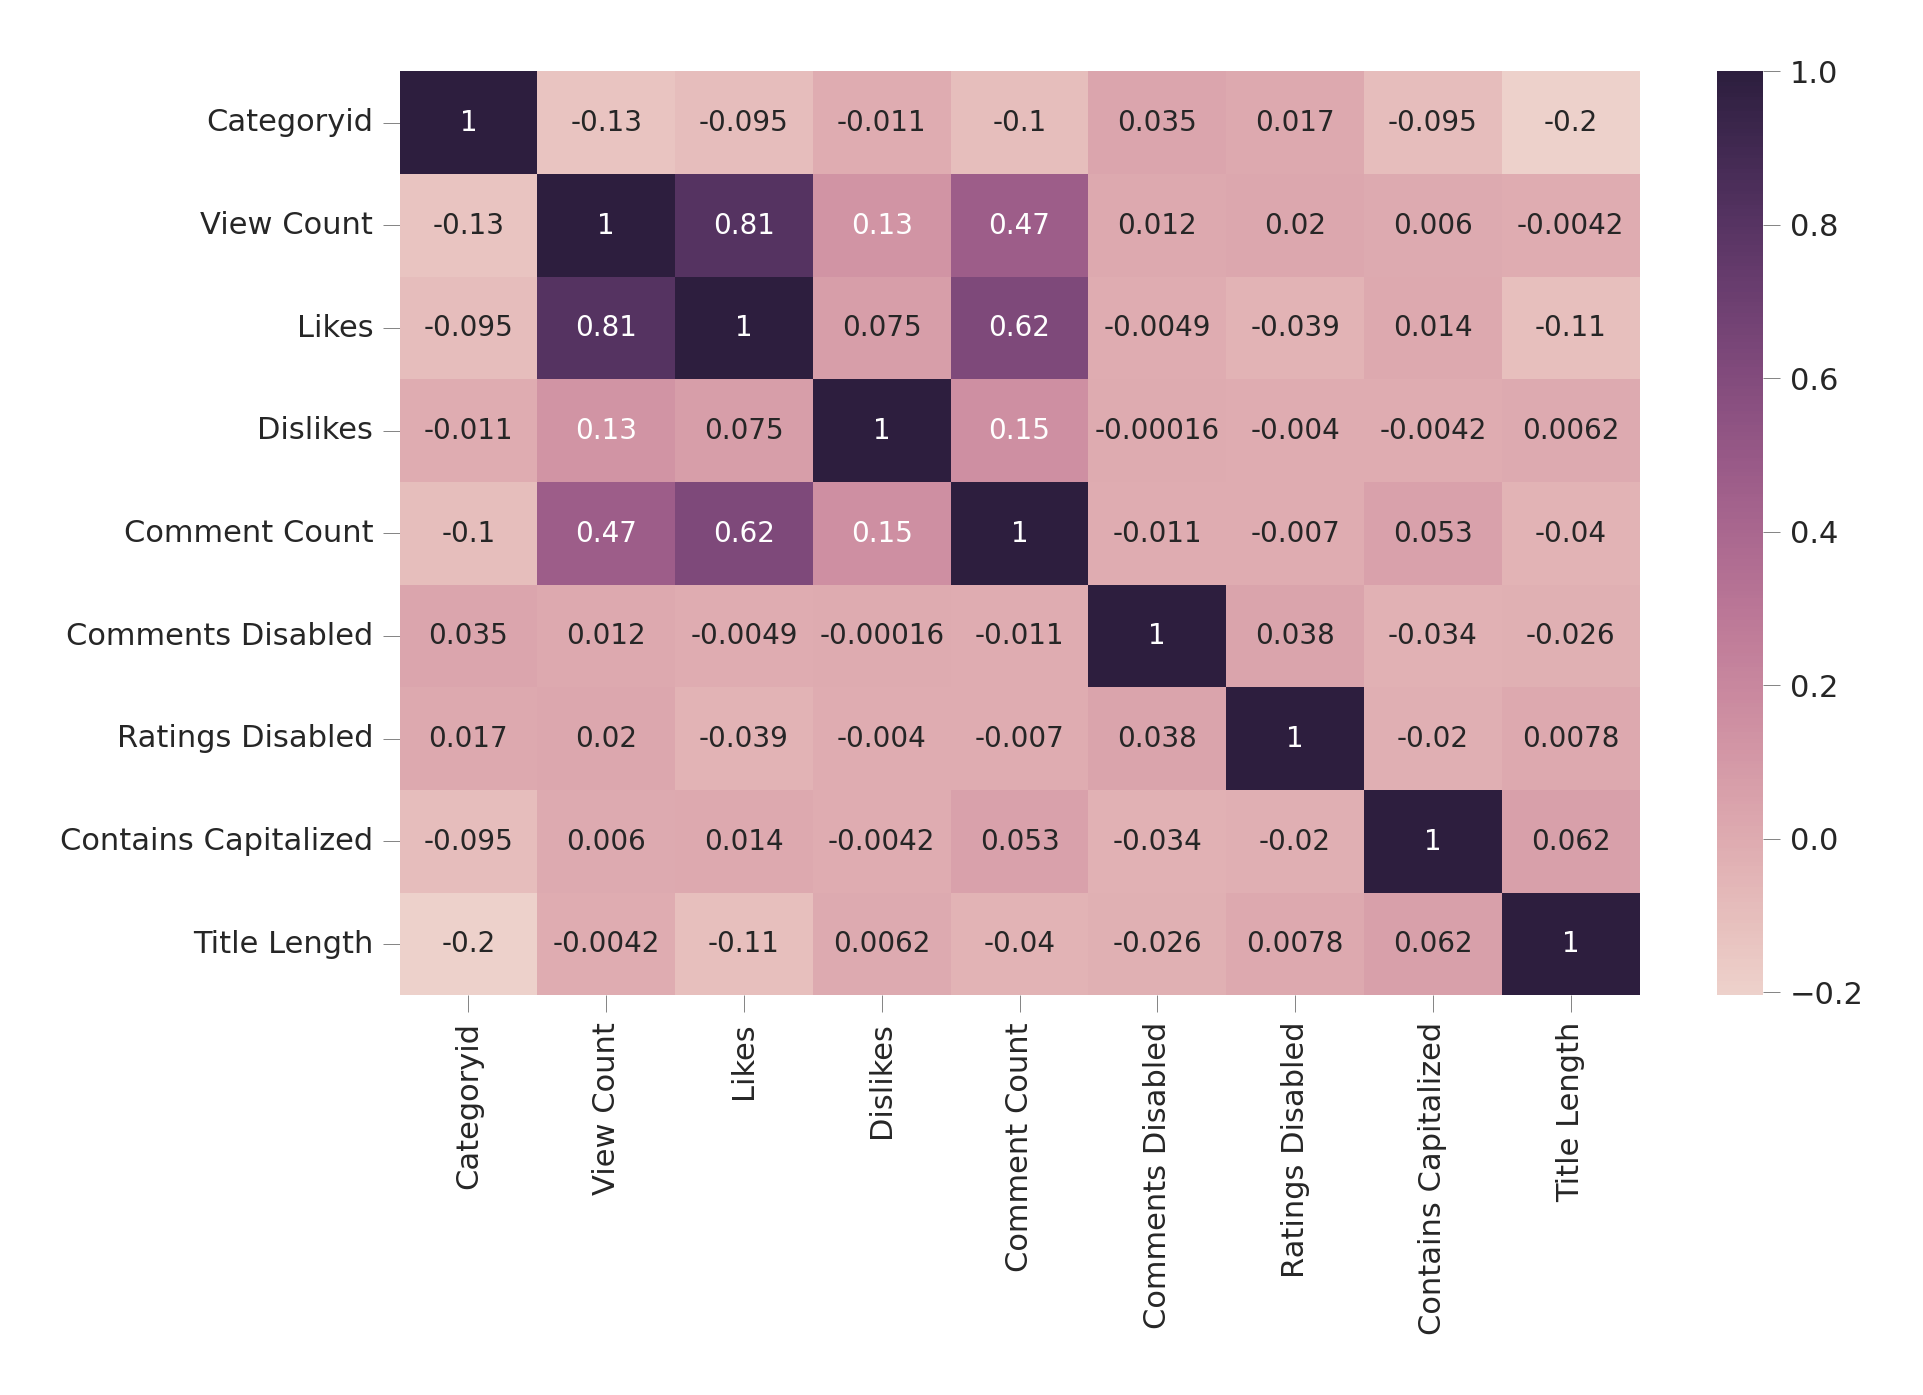

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

The correlation map and correlation table above say that views and likes are highly positively correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables

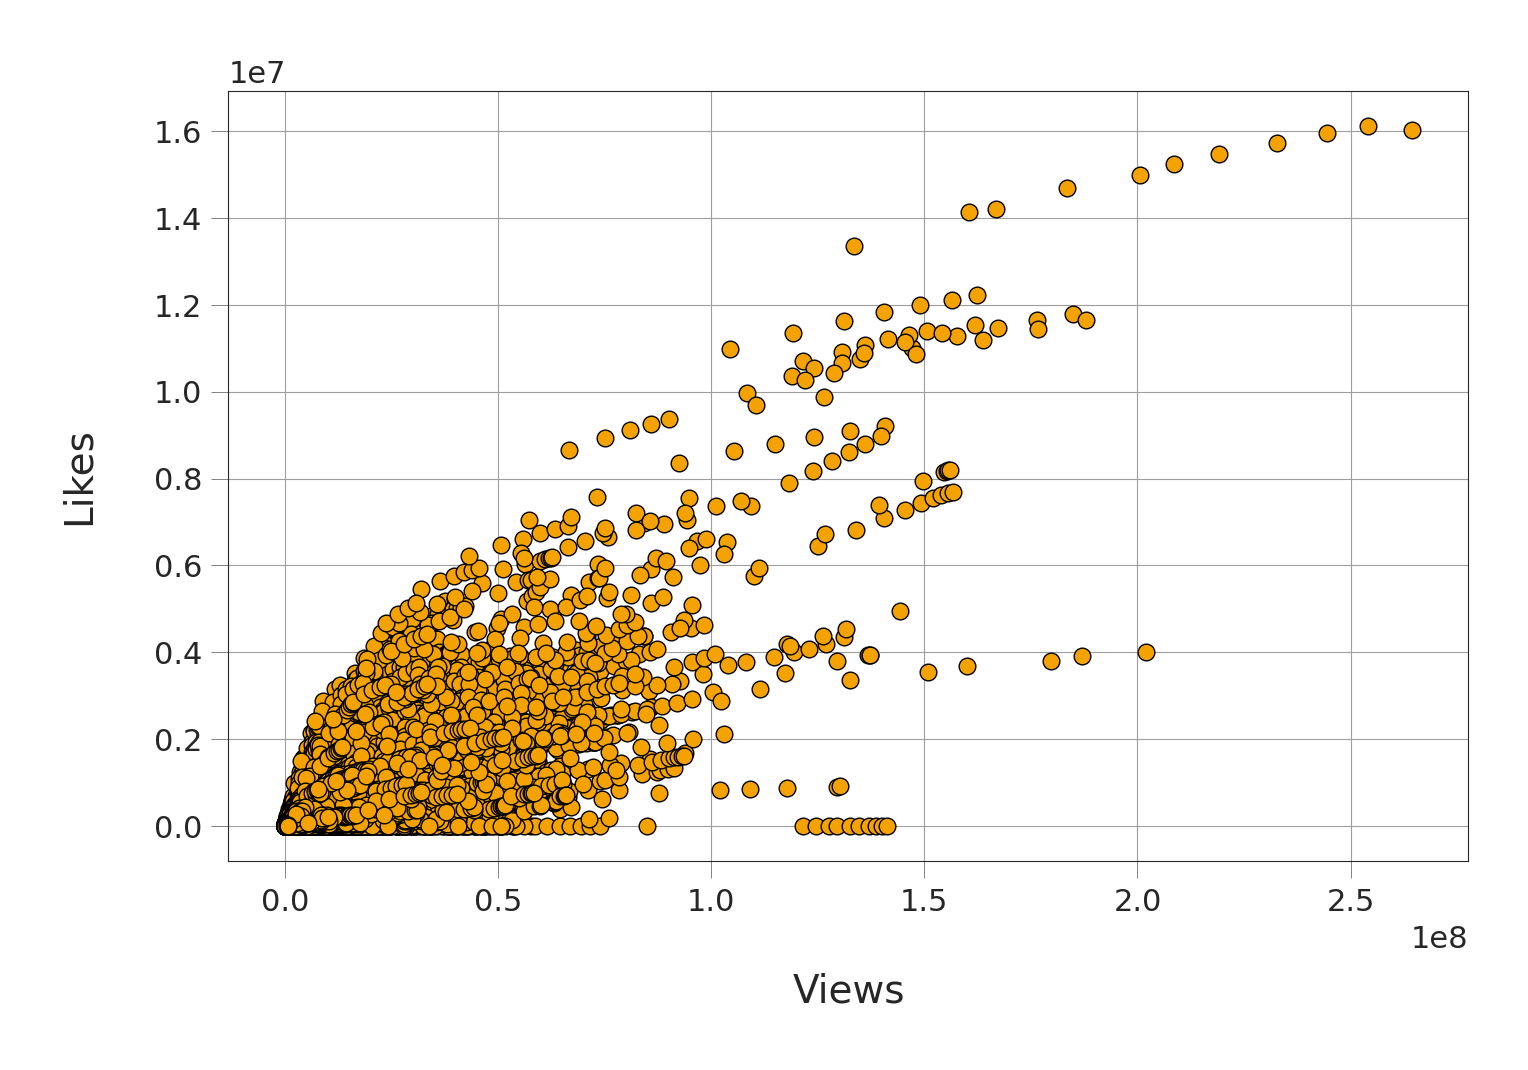

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['view_count'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

Another verification of the correlation matrix and map is the scatter plot we drew above between views and title length as it shows that there is no correlation between them.

## <a name="commti"></a>Most common words in video titles
Let's see if there are some words that are used significantly in trending video titles. We will display the `25` most common words in all trending video titles

In [ ]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 226900),
 ('-', 44144),
 ('||', 26862),
 ('#shorts', 17182),
 ('&', 10892),
 ('2021', 10495),
 ('Song', 8910),
 ('Episode', 8844),
 ('New', 8586),
 ('2022', 7480),
 ('2', 7278),
 ('The', 7114),
 ('in', 6669),
 ('Video', 6636),
 ('Punjabi', 6547),
 ('Official', 6469),
 ('Songs', 6014),
 ('to', 5450),
 ('2020', 5368),
 ('Latest', 5243),
 ('Promo', 5158),
 ('I', 4789),
 ('Video)', 4502),
 ('TV', 4460),
 ('Ka', 4446)]

Ignoring words like "the" and "of", we can see that "-" and "|" symbols occured a lot in the `170000` approx trending video titles: `44000` times and `220000` times respectively. We notice also that words "#shorts", "song", "Episode", and "2021" are common in trending video titles.

Let's draw a word cloud for the titles of our trending videos, which is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is

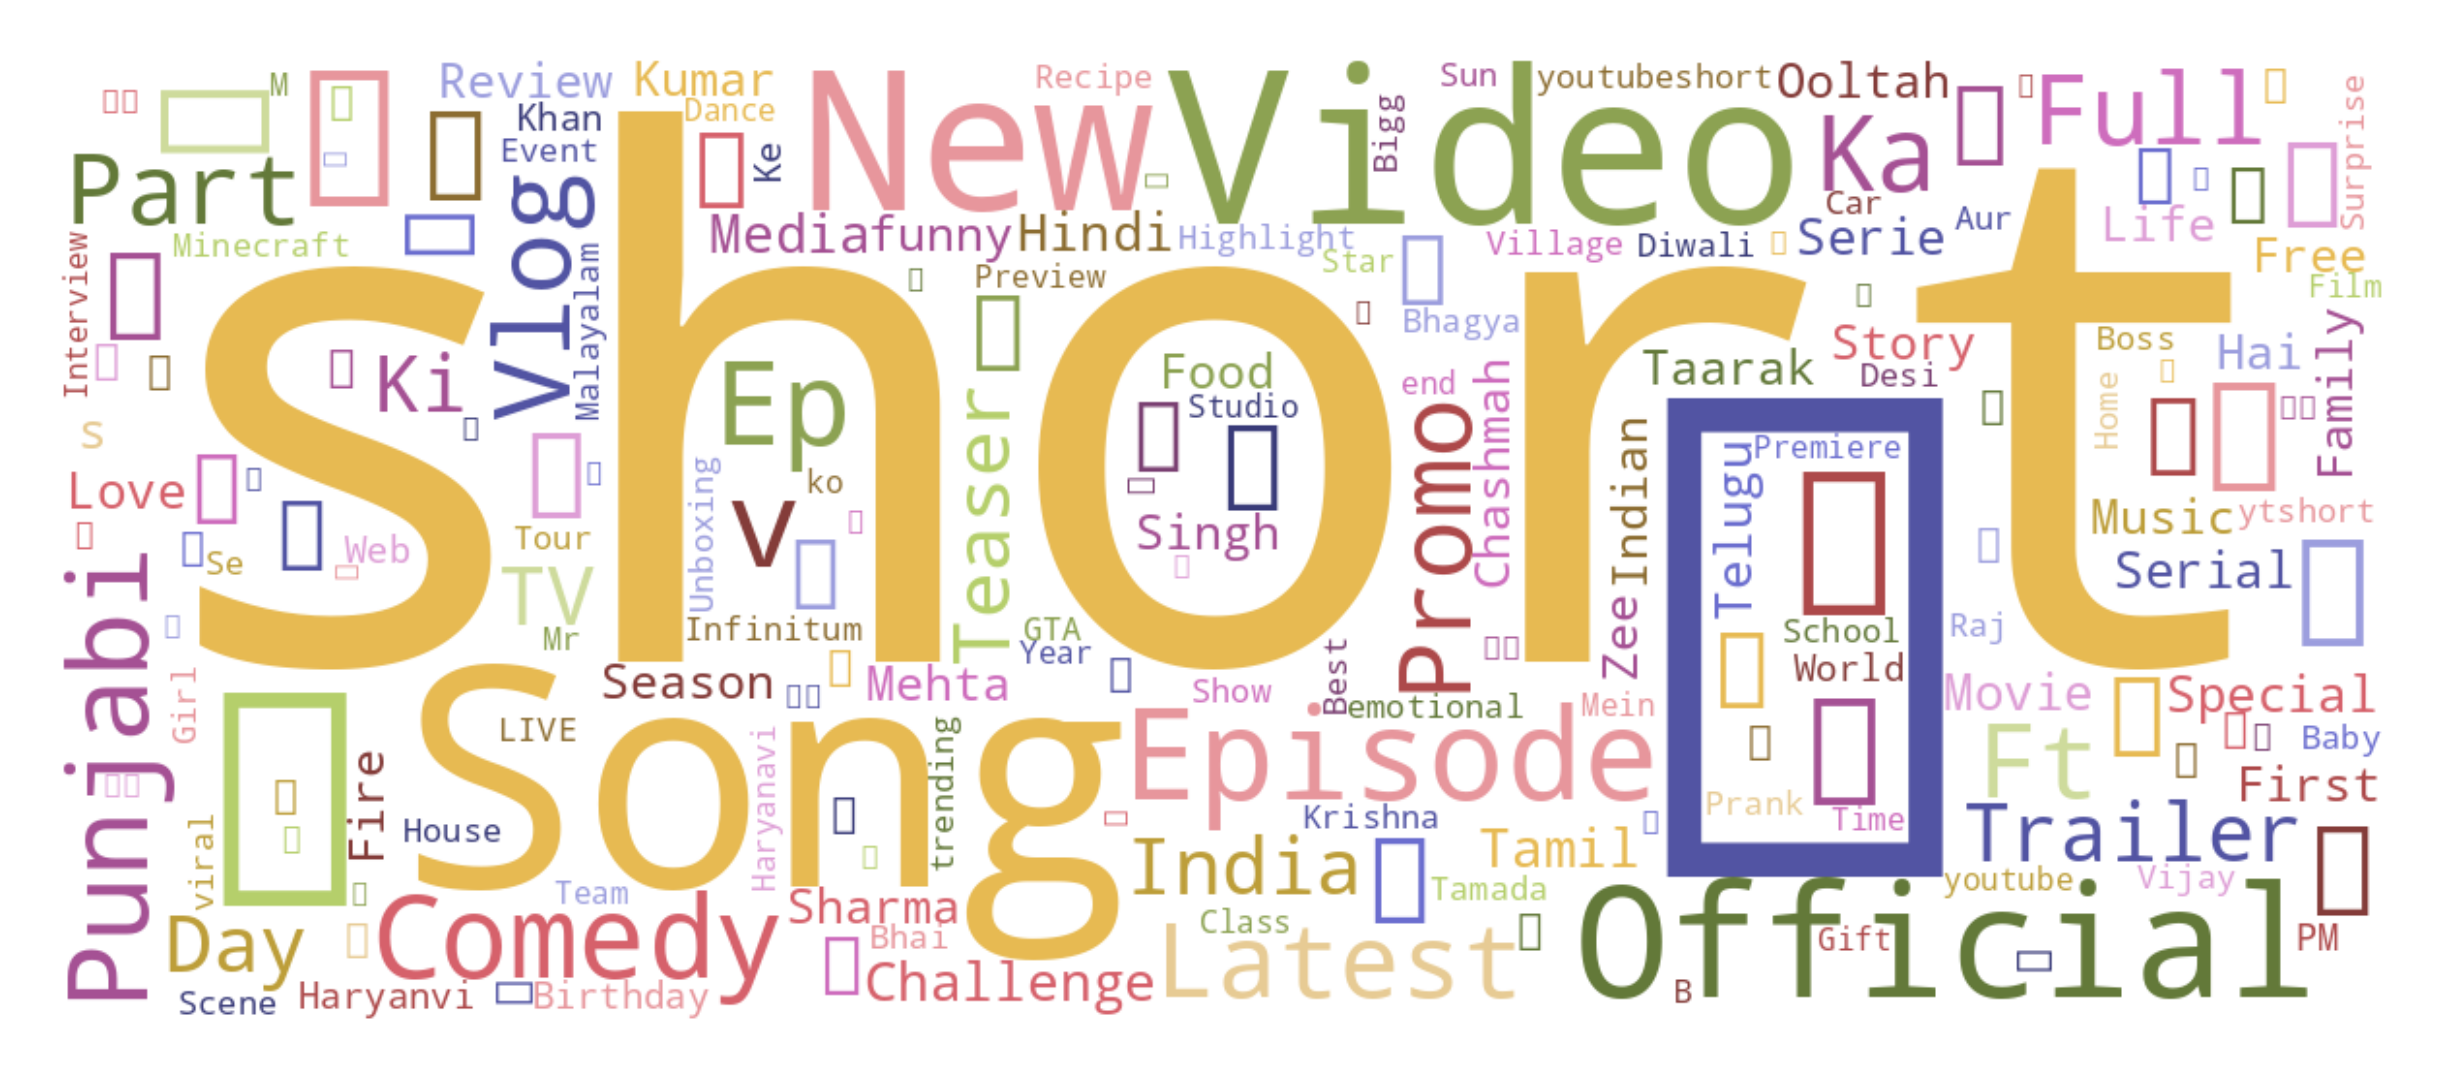

In [ ]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## <a name="chan"></a>Which channels have the largest number of trending videos?

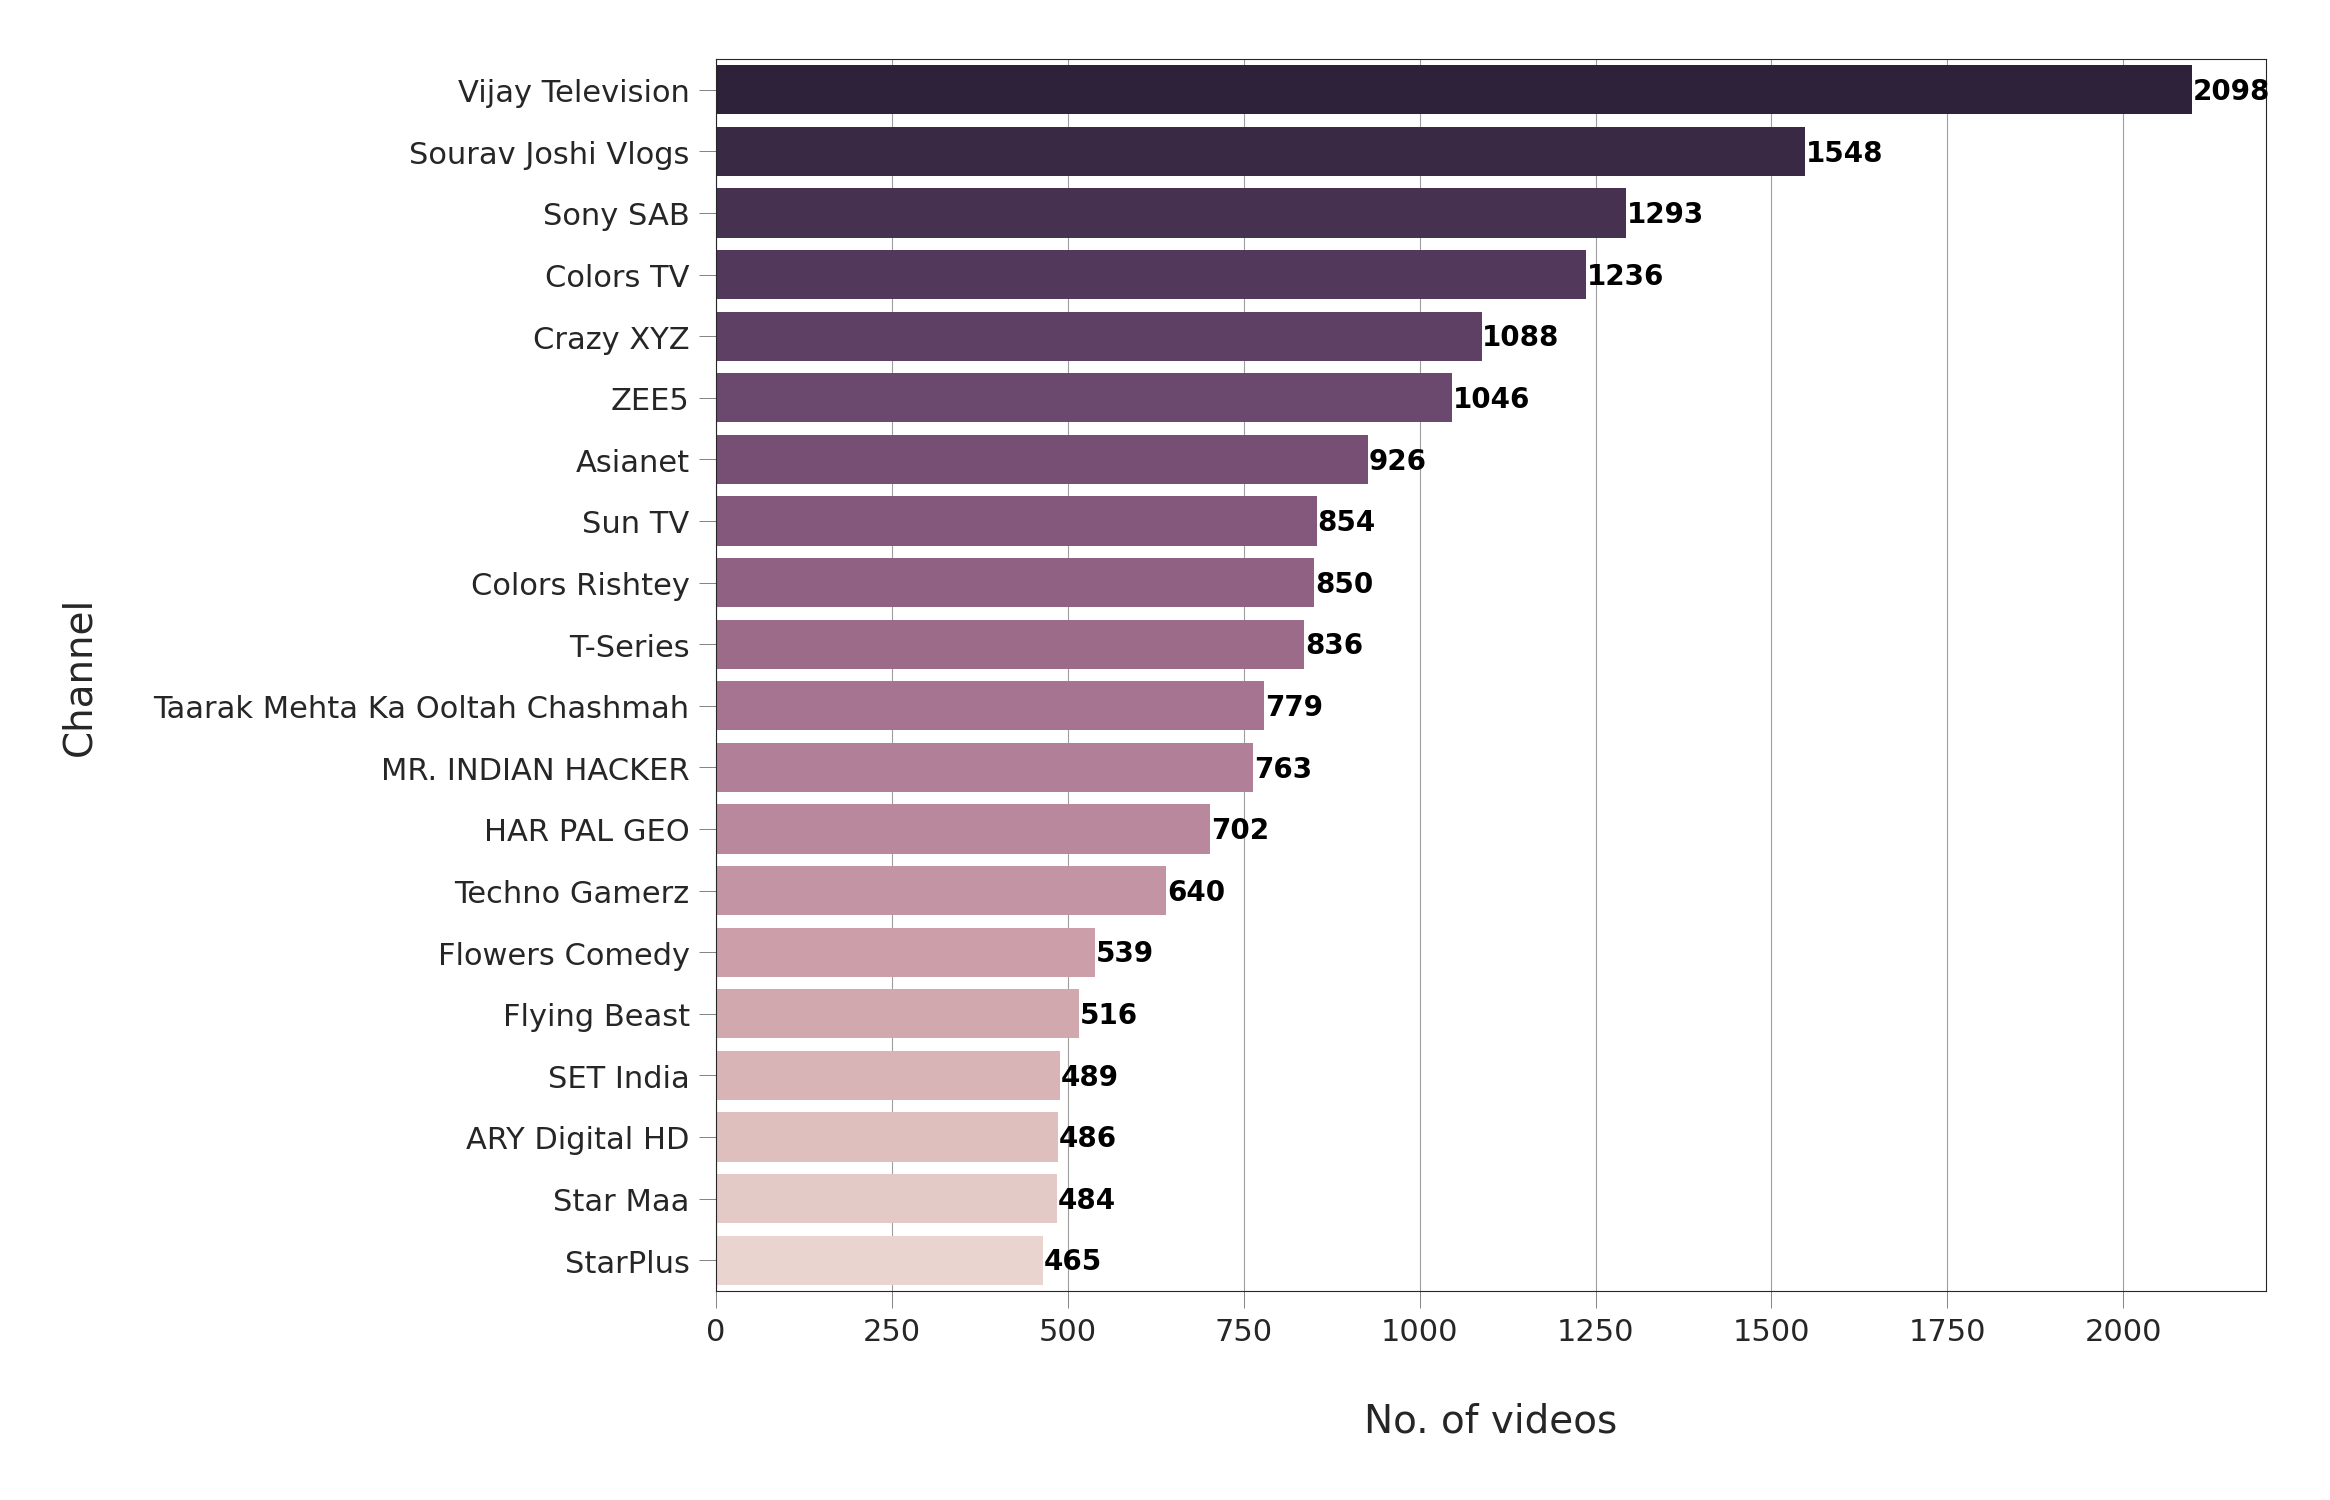

In [ ]:
cdf = df.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10,8))
for i, v in enumerate(cdf['video_count'].head(20)):
    ax.text(v + 1, i + .15, str(v), color='black', fontweight='bold')
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

## <a name="cat"></a>Which video category has the largest number of trending videos?
First, we will add a column that contains category names based on the values in `category_id` column. We will use a category JSON file provided with the dataset which contains information about each category.

In [ ]:
with open("/content/drive/MyDrive/dataset of youtube analysis /archive/IN_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['categoryId'].map(cat_dict)

Now we can see which category had the largest number of trending videos

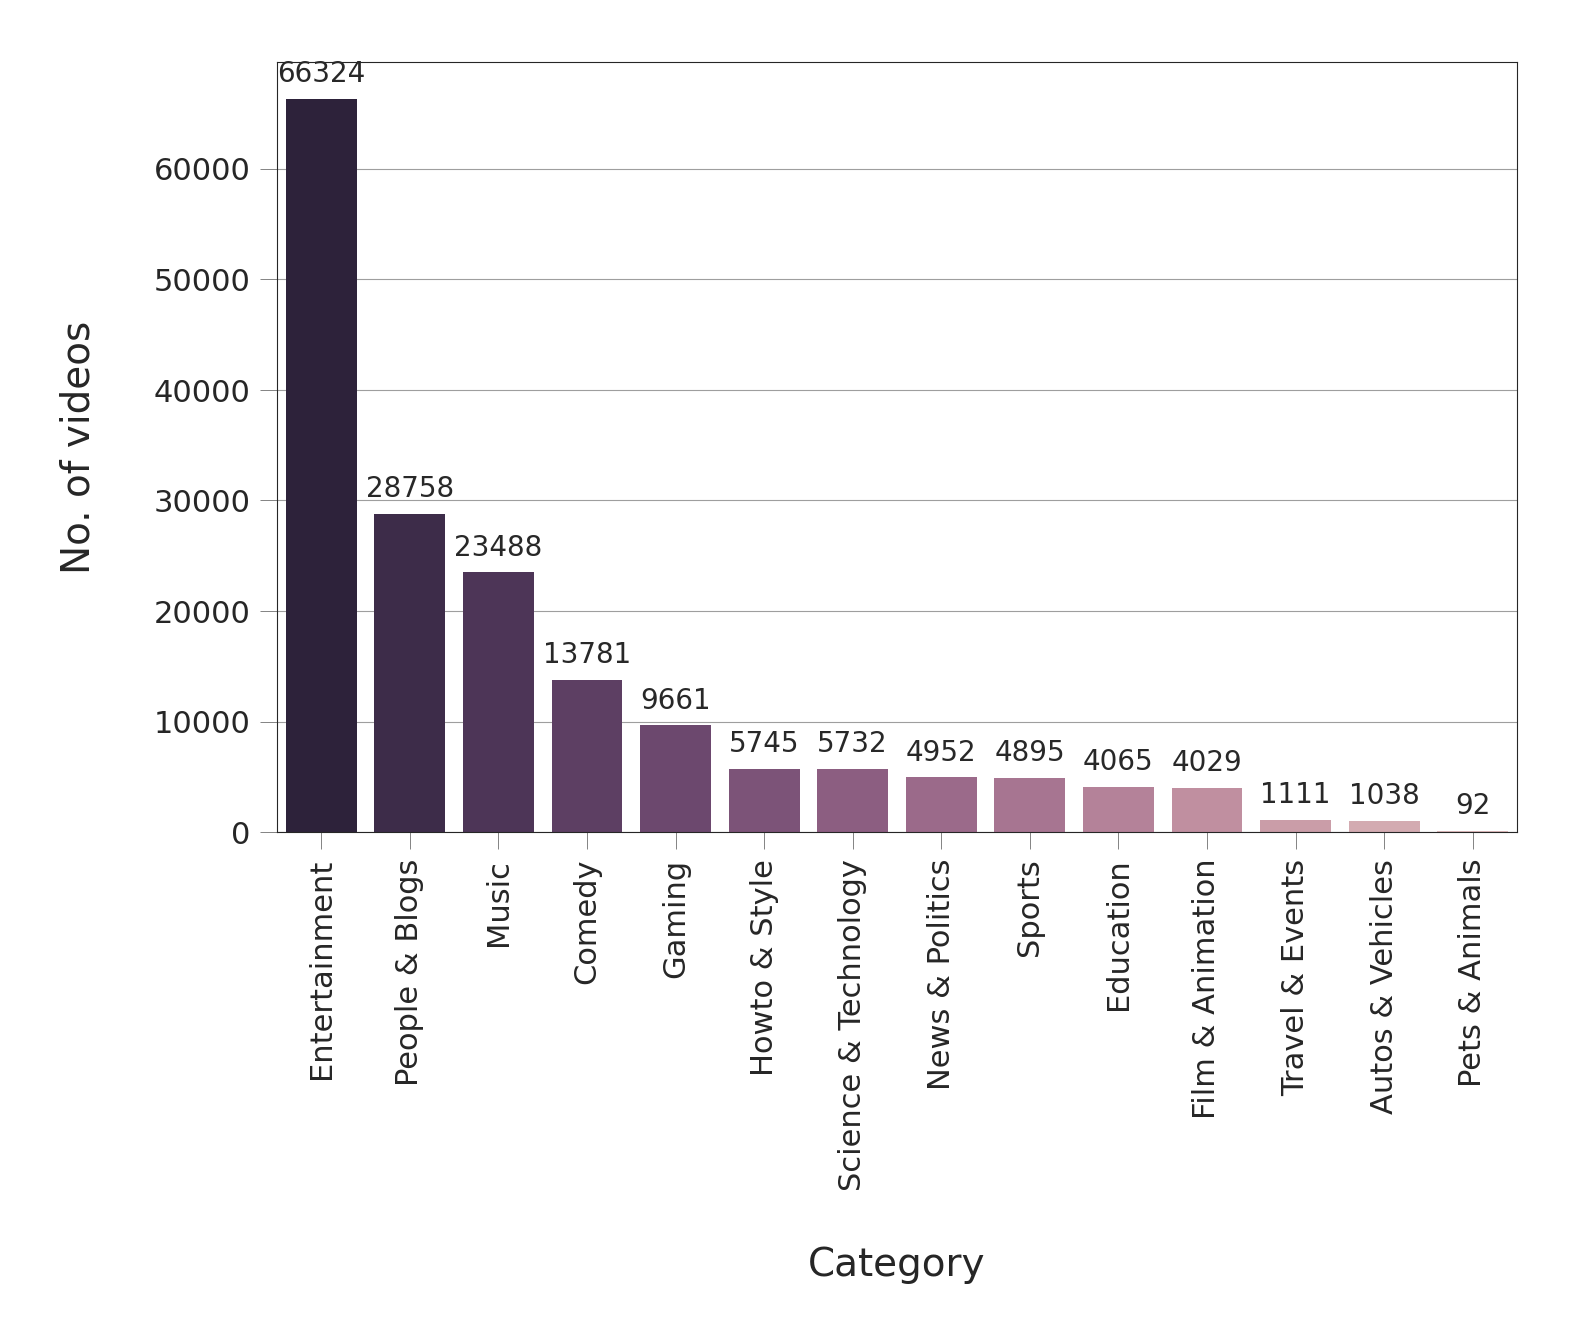

In [ ]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()

_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")
for p in ax.patches:
    _ = ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

We see that the Entertainment category contains the largest number of trending videos among other categories: around `66,000` videos, followed by Peoples & Blogs with around `28,000` videos,followed by Music category with around `23,000` videos and so on.

## <a name="pub"></a>Trending videos and their publishing time
An example value of the `publish_time` column in our dataset is `2017-11-13T17:13:01.000Z`. This means that the date of publishing the video is `2017-11-13` and the time is `17:13:01` in Coordinated Universal Time (UTC) time zone.

Let's add two columns to represent the date and hour of publishing each video, then delete the original `publish_time` column because we will not need it anymore

In [ ]:
df["publishing_day"] = df["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publishedAt"].apply(lambda x: x[11:13])
df.drop(labels='publishedAt', axis=1, inplace=True)

Now we can see which days of the week had the largest numbers of trending videos

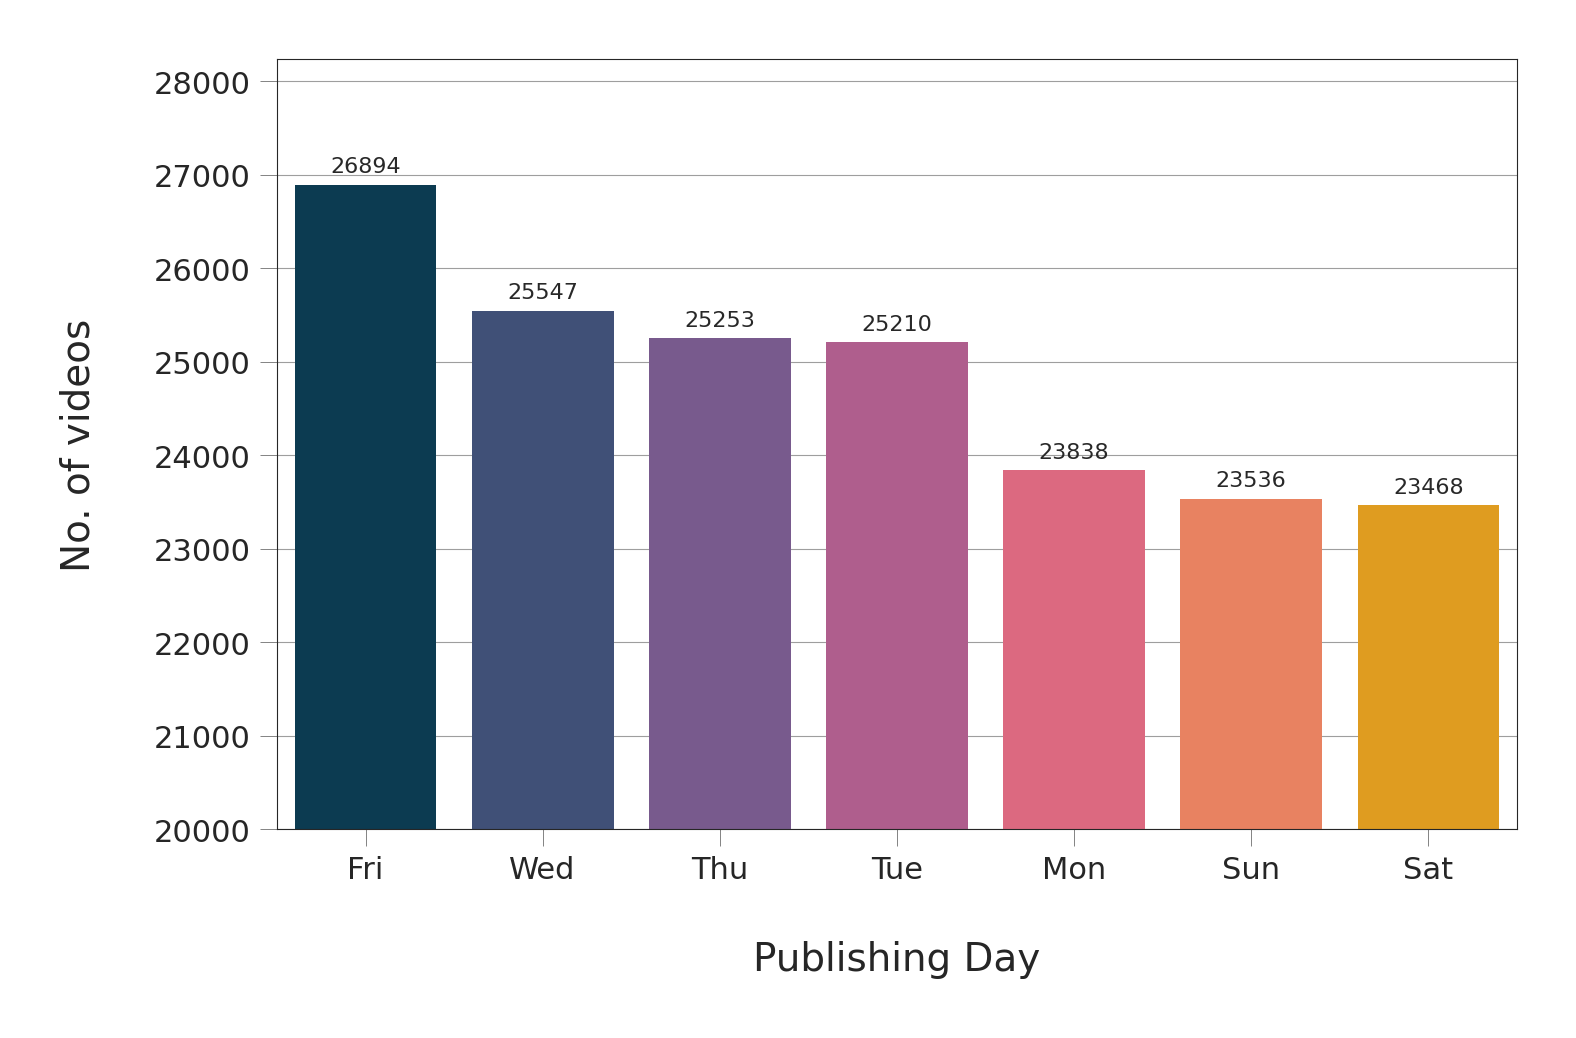

In [ ]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")
_ = ax.set_ylim([20000, ax.get_ylim()[1]]) # set y-axis limits
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=8)

We can see that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.

Now let's use `publishing_hour` column to see which publishing hours had the largest number of trending videos

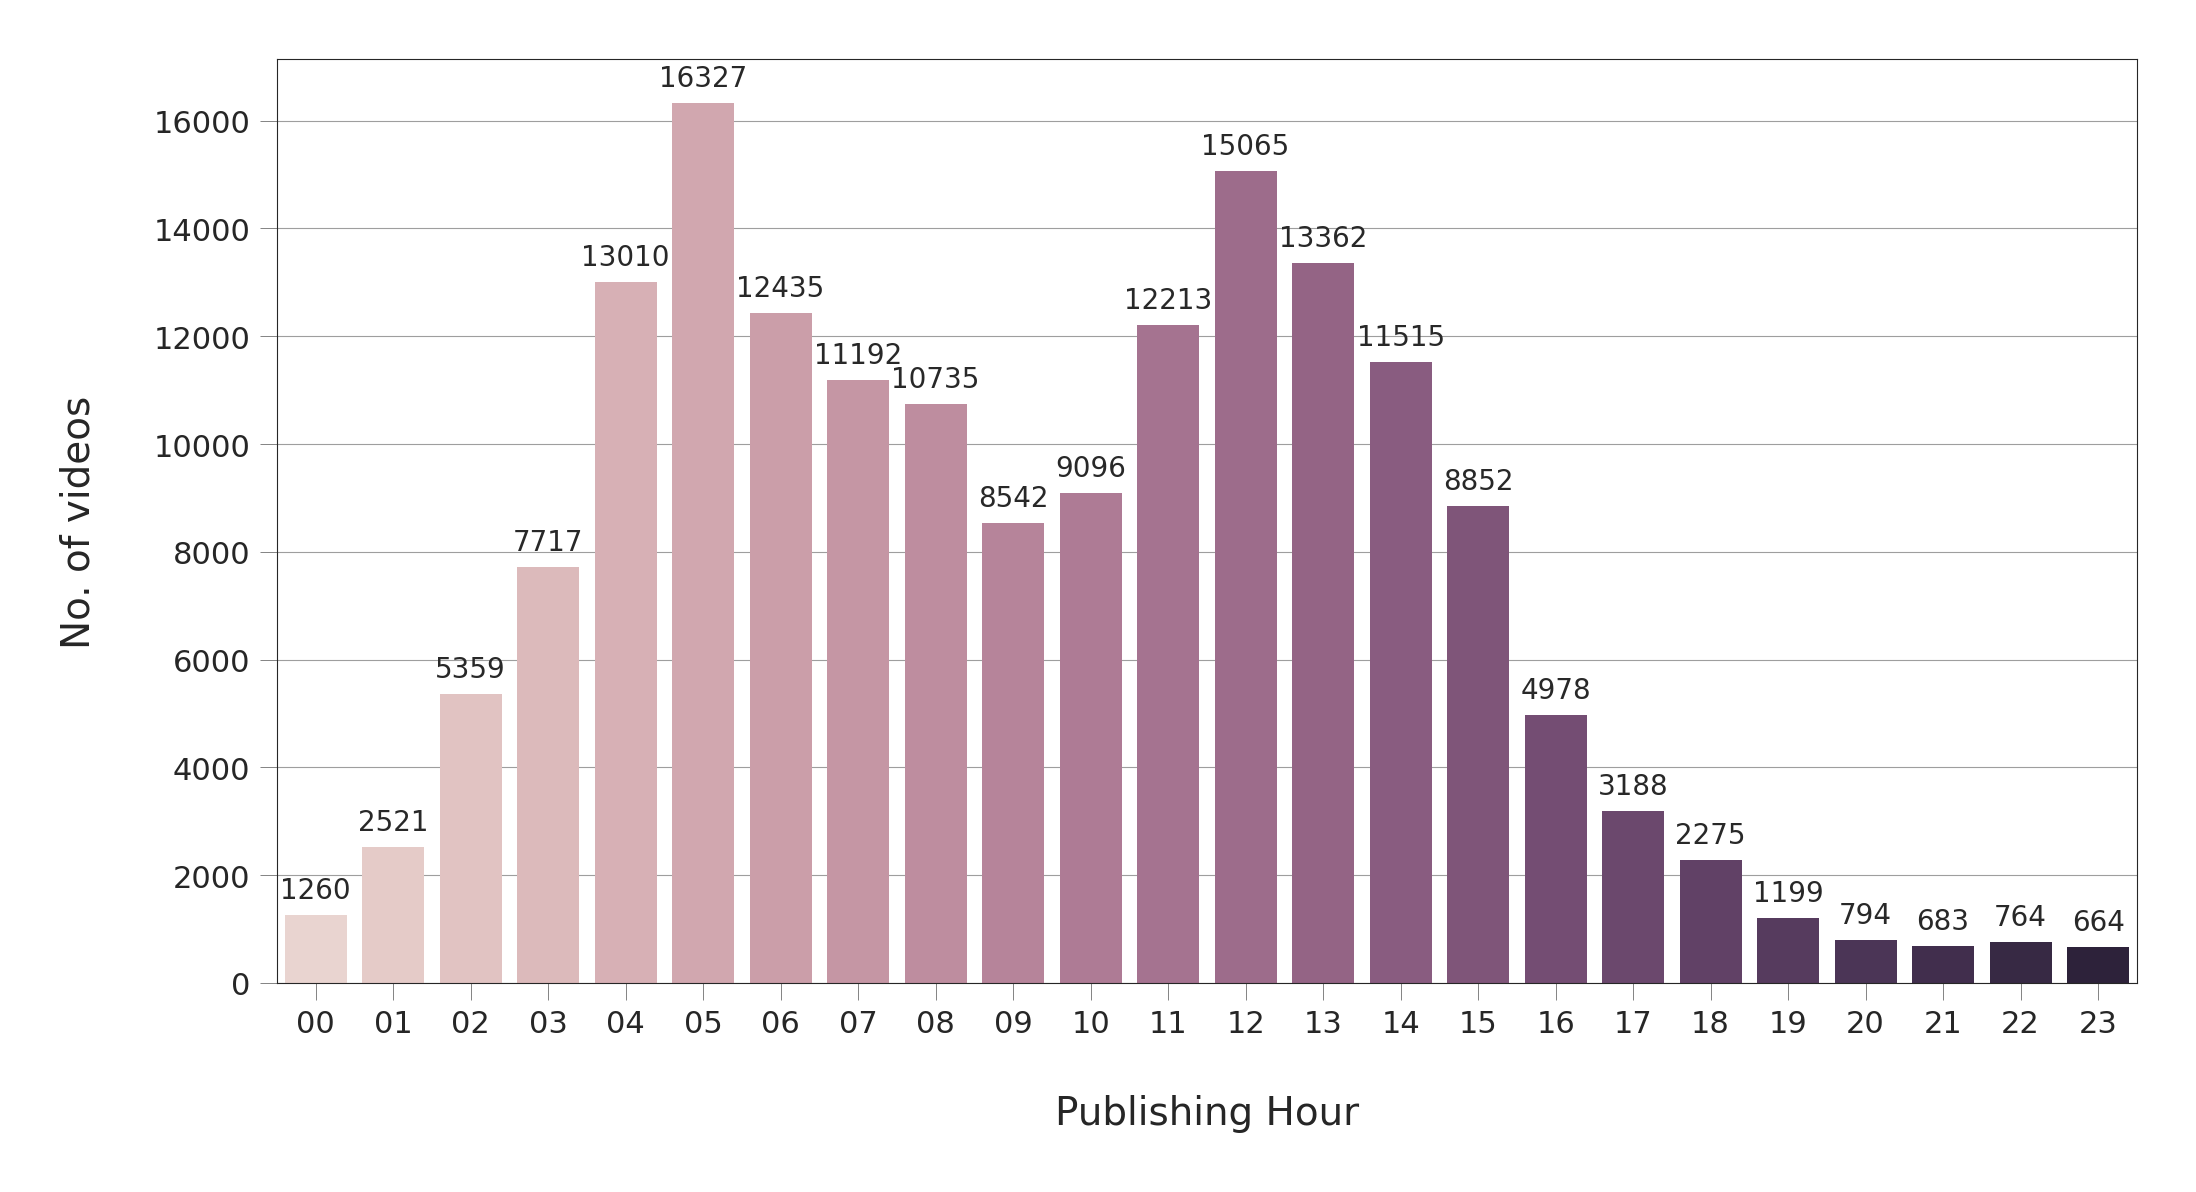

In [ ]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
cdf = cdf.sort_values(by="publishing_hour") # sorting by publishing_hour in ascending order
fig, ax = plt.subplots(figsize=(12, 6))
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")
for p in ax.patches:
    _ = ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

We can see that the period between 4AM and 3PM, peaking between 4AM and 6AM, had the largest number of trending videos. We notice also that the period between 7PM and 12AM has the smallest number of trending videos. But why is that? Is it because people publish a lot more videos between 2PM and 7PM? Is it because how YouTube algorithm chooses trending videos?

## <a name="commdis"></a>How many trending videos have their commets disabled?
To know that, we use `comments_disabled` column

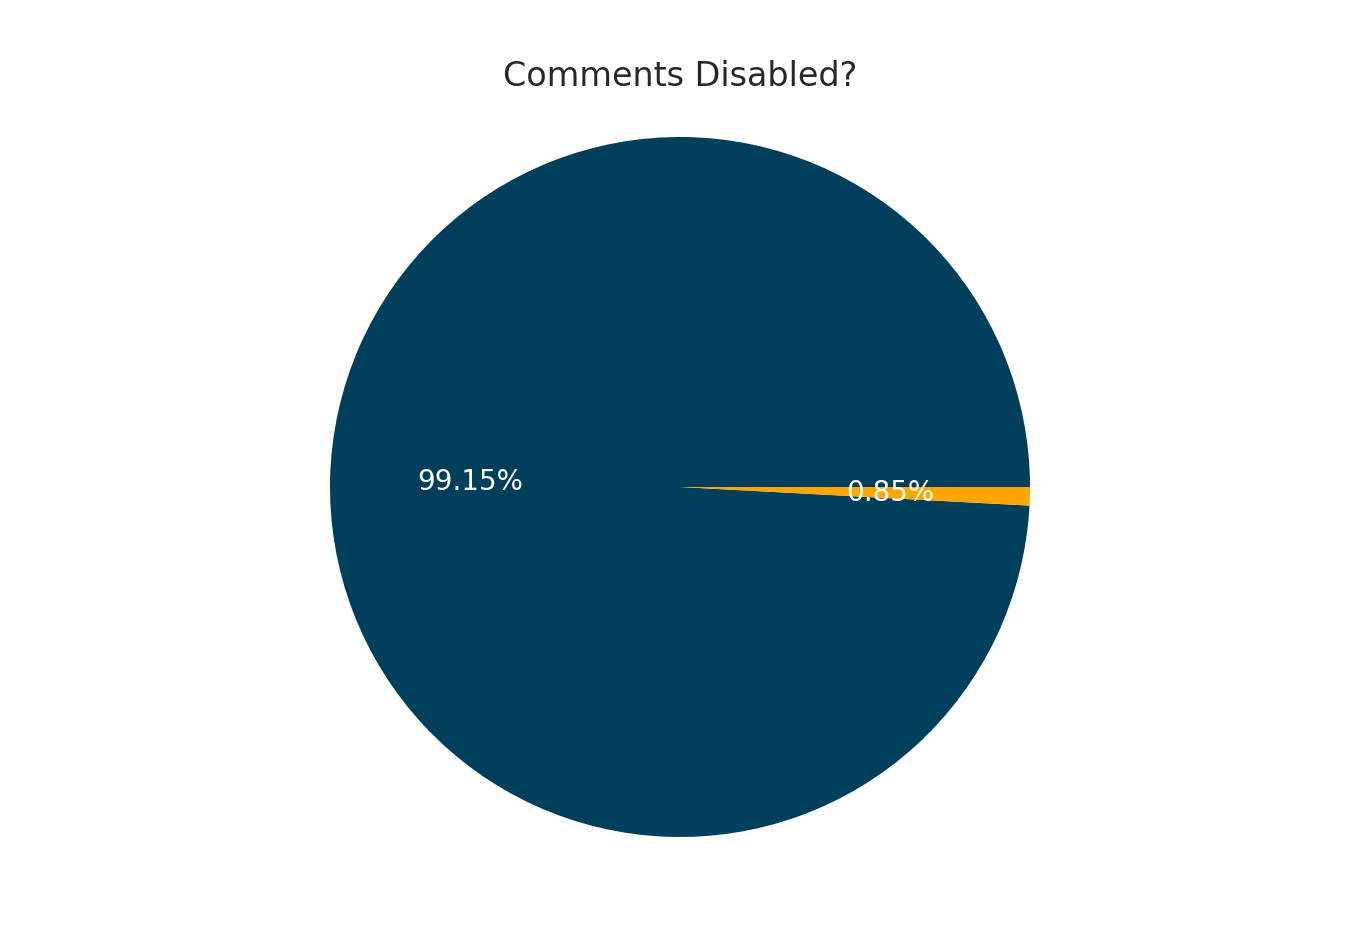

In [ ]:
value_counts = df["comments_disabled"].value_counts()
fig, ax = plt.subplots()
_ = ax.pie(x=value_counts, labels=value_counts.index.map({False: 'No', True: 'Yes'}), 
           colors=['#003f5c', '#ffa600'], textprops={'color': 'white'},
           autopct=lambda p:f'{p:.2f}%')
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [ ]:
df["comments_disabled"].value_counts(normalize=True)

False   0.99
True    0.01
Name: comments_disabled, dtype: float64

We see that only `1%` of trending videos prevented users from commenting.

## <a name="ratdis"></a>How many trending videos have their ratings disabled?
To know that, we use `ratings_disabled` column

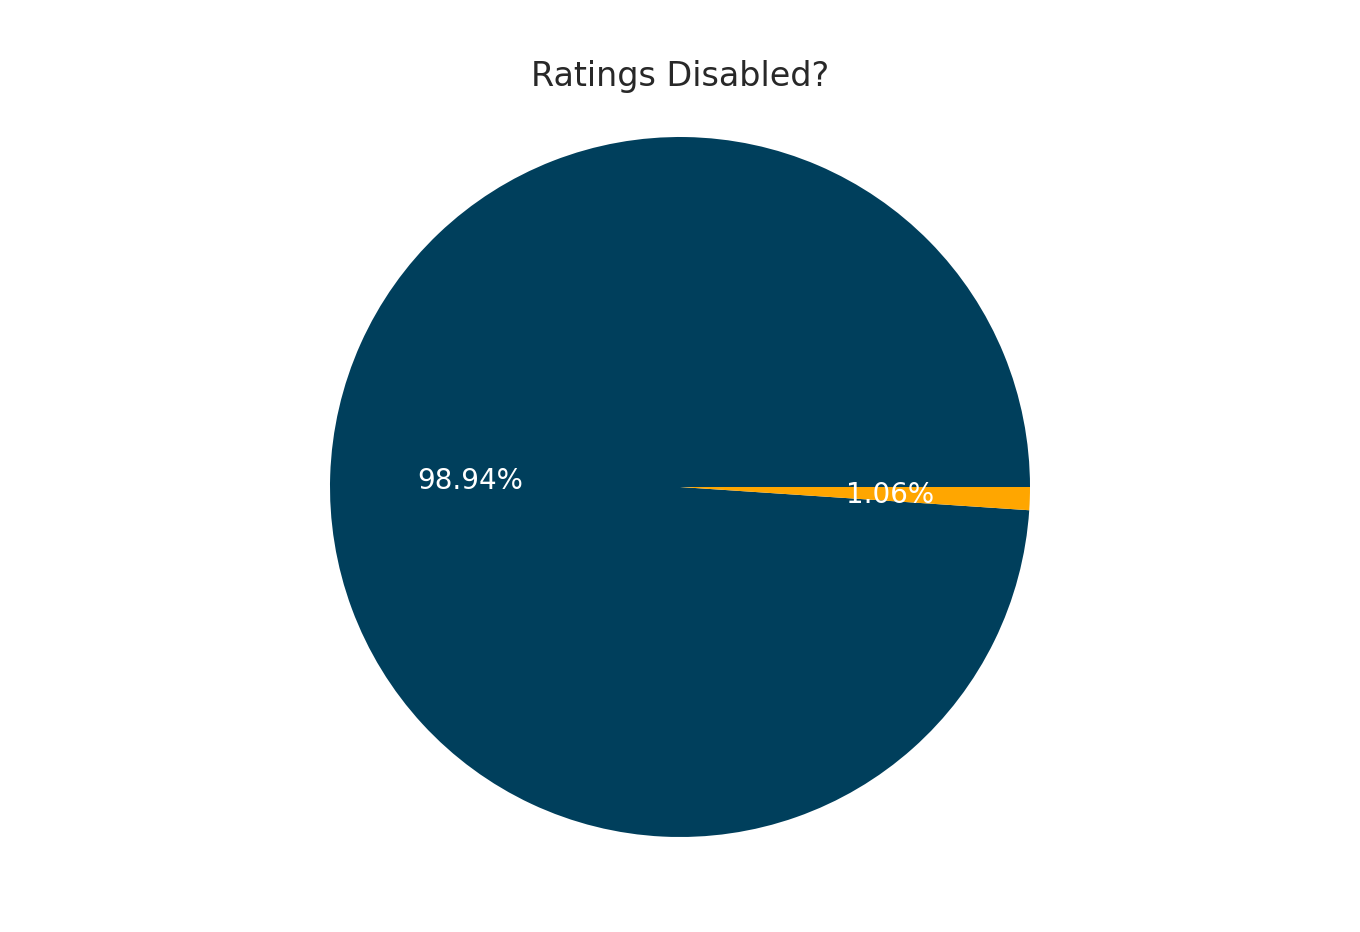

In [ ]:
value_counts = df["ratings_disabled"].value_counts()
fig, ax = plt.subplots()
_ = ax.pie(x=value_counts, labels=value_counts.index.map({False: 'No', True: 'Yes'}), 
           colors=['#003f5c', '#ffa600'], textprops={'color': 'white'},
           autopct=lambda p:f'{p:.2f}%')
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [ ]:
df["ratings_disabled"].value_counts()

False    171908
True       1838
Name: ratings_disabled, dtype: int64

We see that only `1838` trending videos out of `171908` prevented users from commenting.

## <a name="commratdis"></a>How many videos have both comments and ratings disabled?

In [ ]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

77

So there are just `77` trending videos that have both comments and ratings disabled

Here are some of the results we extracted from the analysis:

* The dataset contains `173,746` entries, collected between `2020` and `2023`.
* The majority of trending videos have `5` million views or less, and `46%` have `40,000` likes or less.
* Most trending videos have around `4100` comments, with very high numbers for live streams or crash courses.
* About `42% `of trending video titles contain capitalized words.
* The most common words in trending video titles are `"-"` and `"|"`, as well as `"song"`, `"Episode"`, and `"2021"`.
* The `Entertainment` category has the largest number of trending videos, followed by the `Peoples` & `Blogs`, and `Music` categories.
* The number of trending videos published on `Sunday` and `Saturday` is noticeably less than on other days of the week.
* Only `1%` of trending videos have their comments disabled, and `1838` have their ratings disabled.
* Just `77` trending videos have both comments and ratings disabled.
* There is a strong positive correlation between `views and likes`, `likes and comment` count, and `dislikes and comment` count.